In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
hm=pd.read_csv("hmeq.csv")

In [3]:
data=hm.copy()

data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [4]:
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

In [5]:
data.shape

(5960, 13)

**Insights <br>**
<ul>
    <li> There are a total of 5960 home equity loans in this dataset with 13 parameters for each one.
    <li> DEROG seems to have mostly 0.0 or NaN values, implying that there are less number of serious delinquencies having major derogatory reports.
</ul>

In [6]:
# Remove ___________ and complete the code
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [7]:
data.isnull().mean()*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Insights <br>**
<ul>
    <li> DEBTINC has the highest number of missing values being 1267, which is 21.25% of all values in the column.
    <li> DEROG has the 2nd highest number of missing values being 708, which is 11.87% of all values in the column.
    <li> BAD and LOAN don't have any missing values.
    <li> All other columns have missing values from 5-10%.
</ul>

In [8]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [9]:
cols

['REASON', 'JOB', 'BAD']

In [10]:
for i in cols:
    data[i] = data[i].astype('category')

In [11]:
# Checking the info again and the datatype of different variable
# remove ___________ and complete the code
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


In [12]:
# Analyze the summary statistics for numerical variables
# Remove ___________ and complete the code
data.describe()

LOAN        MORTDUE          VALUE          YOJ        DEROG  \
count   5960.000000    5442.000000    5848.000000  5445.000000  5252.000000   
mean   18607.969799   73760.817200  101776.048741     8.922268     0.254570   
std    11207.480417   44457.609458   57385.775334     7.573982     0.846047   
min     1100.000000    2063.000000    8000.000000     0.000000     0.000000   
25%    11100.000000   46276.000000   66075.500000     3.000000     0.000000   
50%    16300.000000   65019.000000   89235.500000     7.000000     0.000000   
75%    23300.000000   91488.000000  119824.250000    13.000000     0.000000   
max    89900.000000  399550.000000  855909.000000    41.000000    10.000000   

            DELINQ        CLAGE         NINQ         CLNO      DEBTINC  
count  5380.000000  5652.000000  5450.000000  5738.000000  4693.000000  
mean      0.449442   179.766275     1.186055    21.296096    33.779915  
std       1.127266    85.810092     1.728675    10.138933     8.601746  
min       0.000000     0.000000     0.000000     0.000000     0.524499  
25%       0.000000   115.116702     0.000000    15.000000    29.140031  
50%       0.000000   173.466667     1.000000    20.000000    34.818262  
75%       0.000000   231.562278     2.000000    26.000000    39.003141  
max      15.000000  1168.233561    17.000000    71.000000   203.312149

**Insights <br>**
<ul>
    <li> Except DEBTINC, mean for all the other columns are greater than their respective medians, which implies a positive skew.
    <li> For DEROG and DELINQ, 75% of the data is 0. Maximum value in DEROG and DELINQ is 10 and 15 respectively, which indicates the presence of outliers.
</ul>

In [13]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']
# Remove ___________ and complete the code
data.describe(include=['category']).T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

**Insights <br>**
<ul>
    <li> REASON and JOB have some missing values whereas BAD doesn't.
    <li> BAD and REASON have binary values since unique=2. JOB has 6 different types of values.
    <li> In BAD, 0 occours 4771 times and is the most frequently occurring value. Therefore 80% of the data in BAD is 0 and around 20% is 1. This indicates that most people are non delinquents in and this data is highly imbalanced.
    <li> In REASON, the most frequently occurring value is DebtCon with freq = 3928. This implies that most loans are taken out for debt consolidation in order to pay off other liabilities or debts of the payee. 3928 is 68.81% of the data without missing values. The data in this column is not that imbalanced.
    <li> In JOB, other is the most frequently occurring value.
</ul>

In [14]:
# Checking the count of unique values in each categorical column 
# Remove ___________ and complete the code

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*40)

Unique values in BAD are :
0    4771
1    1189
Name: BAD, dtype: int64
****************************************
Unique values in REASON are :
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
****************************************
Unique values in JOB are :
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
****************************************


In [15]:
# Checking the count of unique values in each categorical column 
# Remove ___________ and complete the code

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize=True))
    print('*'*40)

Unique values in BAD are :
0    0.800503
1    0.199497
Name: BAD, dtype: float64
****************************************
Unique values in REASON are :
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
Unique values in JOB are :
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************


**Insights <br>**
Calculating the percentages of the unique values instead of the absolute values gives better insights in understanding the data. The percentages of the data consisting of the respective unique values of the different columns are given in the cell above.
<ul>
    <li> BAD is a binary valued column and is highly imbalanced with 80% of the data as 0 and 20% of it as 1.
    <li> REASON is also a binary valued column and does not have ideally balanced data. But it is better than BAD, with DebtCon and HomeImp comprising 68.81% and 31.18% of the data respectively.
    <li> JOB has 6 unique values with the top 2 most occurring values being Other and ProfExe comprising 42.03% and 22.46% of the data.
</ul>

## **Exploratory Data Analysis (EDA) and Visualization**
## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables
### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [16]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,20), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           gridspec_kw = {"height_ratios": (.5, .5)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

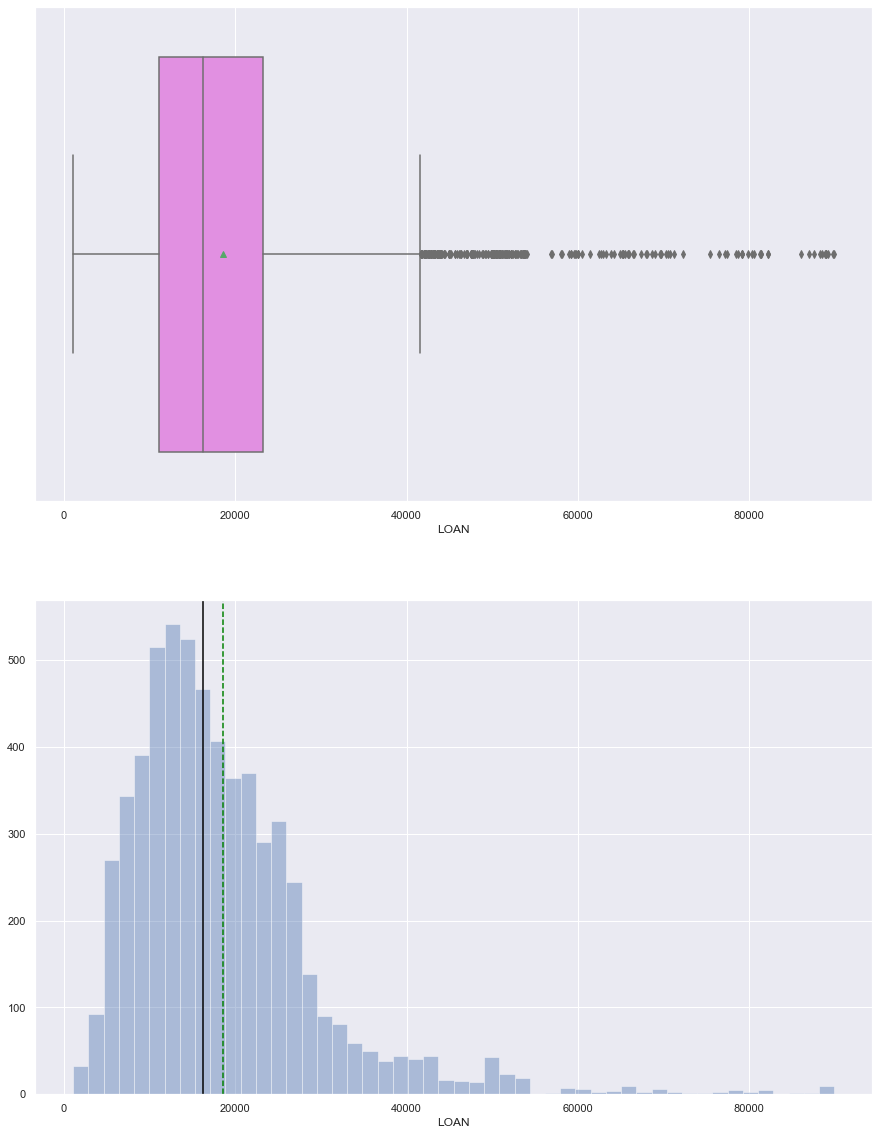

In [17]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

In [18]:
print('Skew :',round(data['LOAN'].skew(), 2))

Skew : 2.02


**Insights <br>**
<ul>
    <li> In the boxplot, it can be observed that there are a lot of outliers occurring beyond 40,000. 75% of the loan amounts range from around 17,000 (Q1) to 40,000 (Q4). 
    <li> As seen in above the mean is greater than the median giving a positive skew of 2.02 in the data.
    <li> By observing the distplot, it can be inferred that that loans of amount ranging from 10,000 to 30,000 have the highest frequency.
    <li> The outliers are very large going beyond 80,000. This is possibly the main reason behind the skew of the data.
</ul>

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

In [19]:
df_not_cat = data.select_dtypes(exclude='category')
df_not_cat

LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0      1100  25860.0   39025.0  10.5    0.0     0.0   94.366667   1.0   9.0   
1      1300  70053.0   68400.0   7.0    0.0     2.0  121.833333   0.0  14.0   
2      1500  13500.0   16700.0   4.0    0.0     0.0  149.466667   1.0  10.0   
3      1500      NaN       NaN   NaN    NaN     NaN         NaN   NaN   NaN   
4      1700  97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0  14.0   
...     ...      ...       ...   ...    ...     ...         ...   ...   ...   
5955  88900  57264.0   90185.0  16.0    0.0     0.0  221.808718   0.0  16.0   
5956  89000  54576.0   92937.0  16.0    0.0     0.0  208.692070   0.0  15.0   
5957  89200  54045.0   92924.0  15.0    0.0     0.0  212.279697   0.0  15.0   
5958  89800  50370.0   91861.0  14.0    0.0     0.0  213.892709   0.0  16.0   
5959  89900  48811.0   88934.0  15.0    0.0     0.0  219.601002   0.0  16.0   

        DEBTINC  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
5955  36.112347  
5956  35.859971  
5957  35.556590  
5958  34.340882  
5959  34.571519  

[5960 rows x 10 columns]

Skew : 2.02


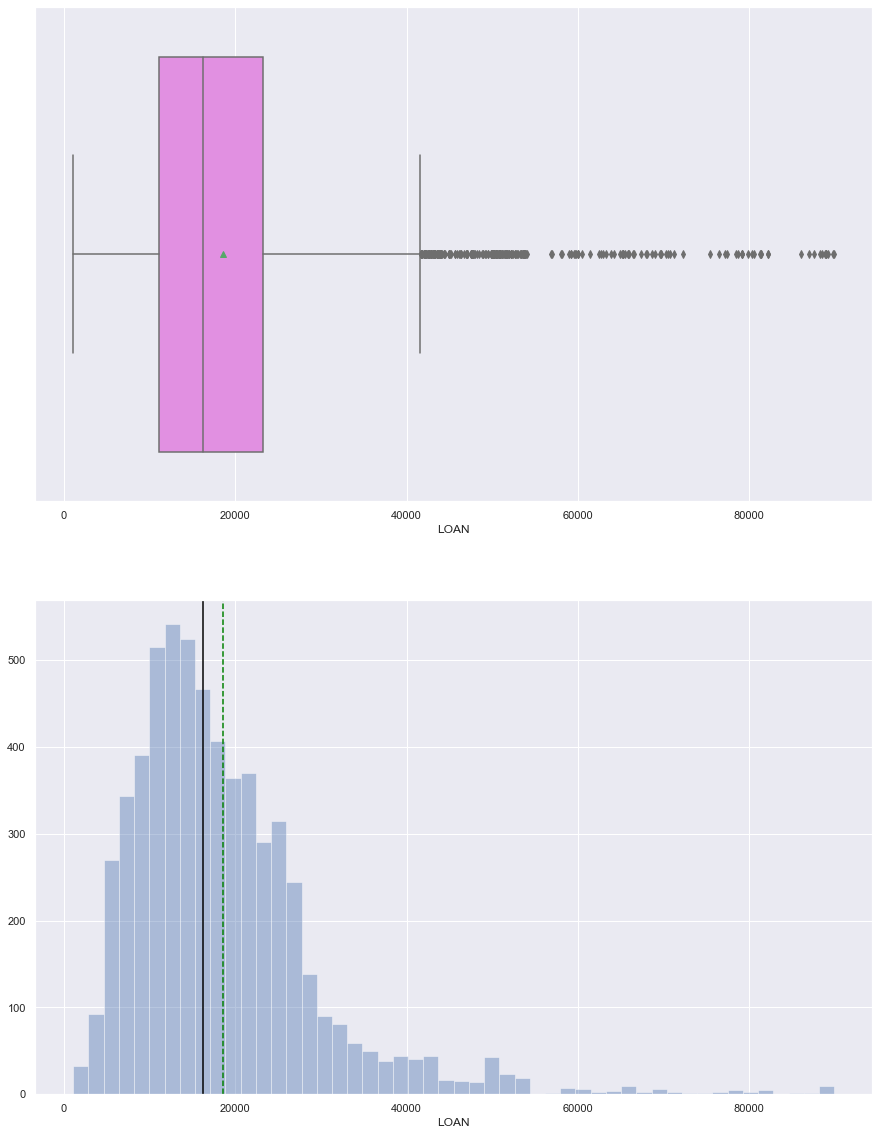

In [20]:
print('Skew :',round(data['LOAN'].skew(), 2))
histogram_boxplot(data['LOAN'])

Skew : 1.81


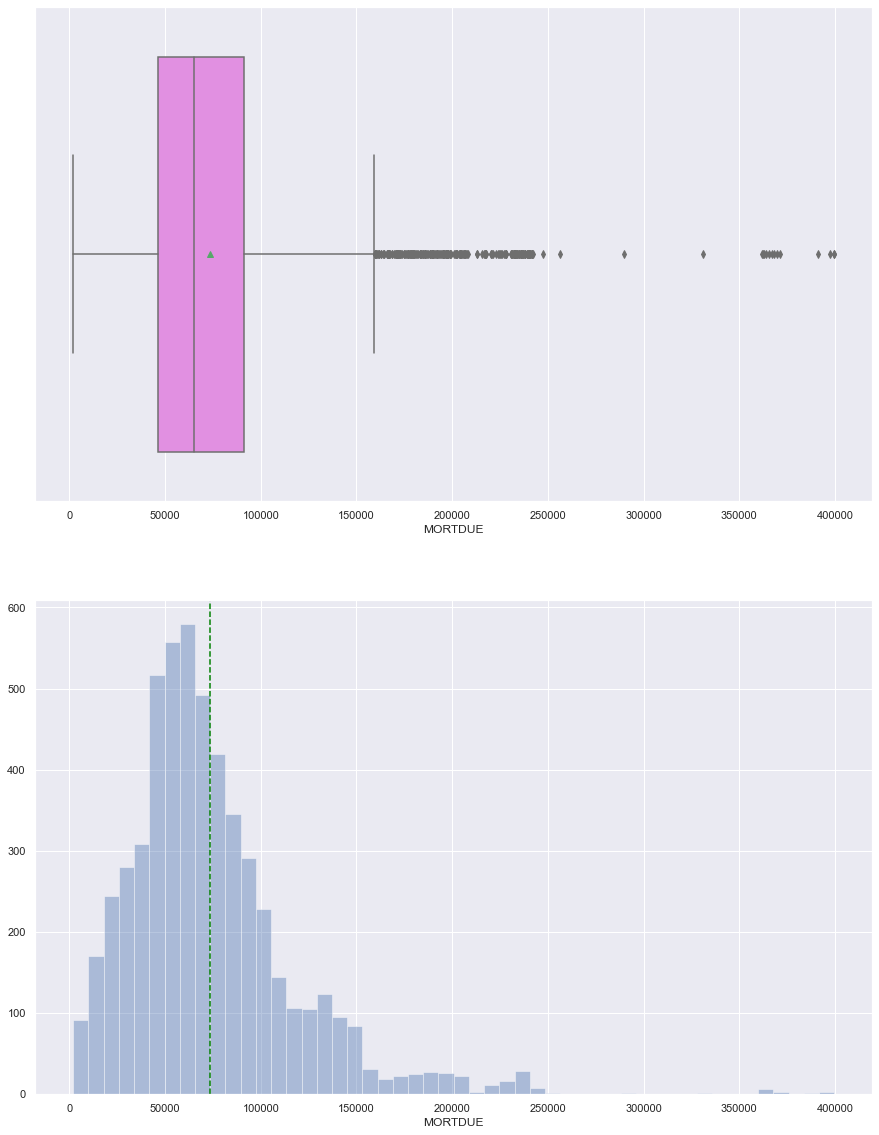

In [21]:
print('Skew :',round(data['MORTDUE'].skew(), 2))
histogram_boxplot(data['MORTDUE'])

Skew : 3.05


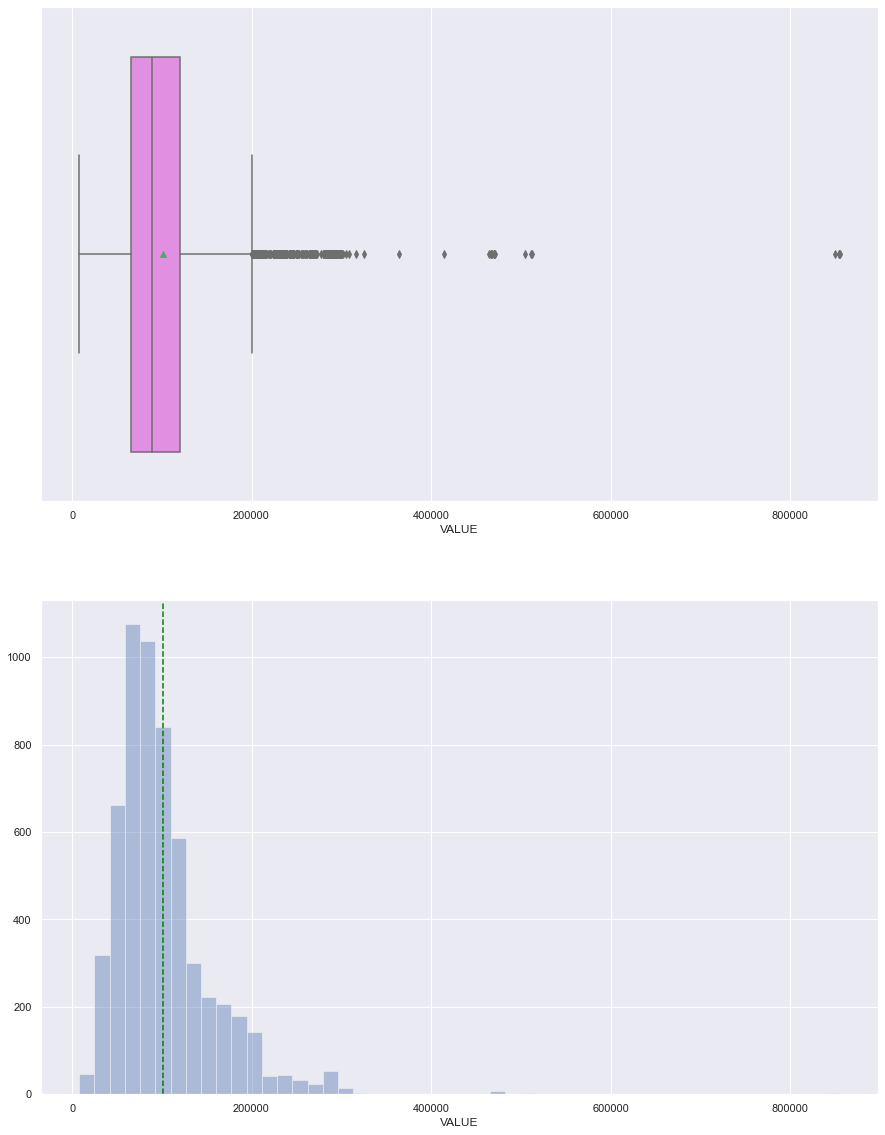

In [22]:
print('Skew :',round(data['VALUE'].skew(), 2))
histogram_boxplot(data['VALUE'])

Skew : 0.99


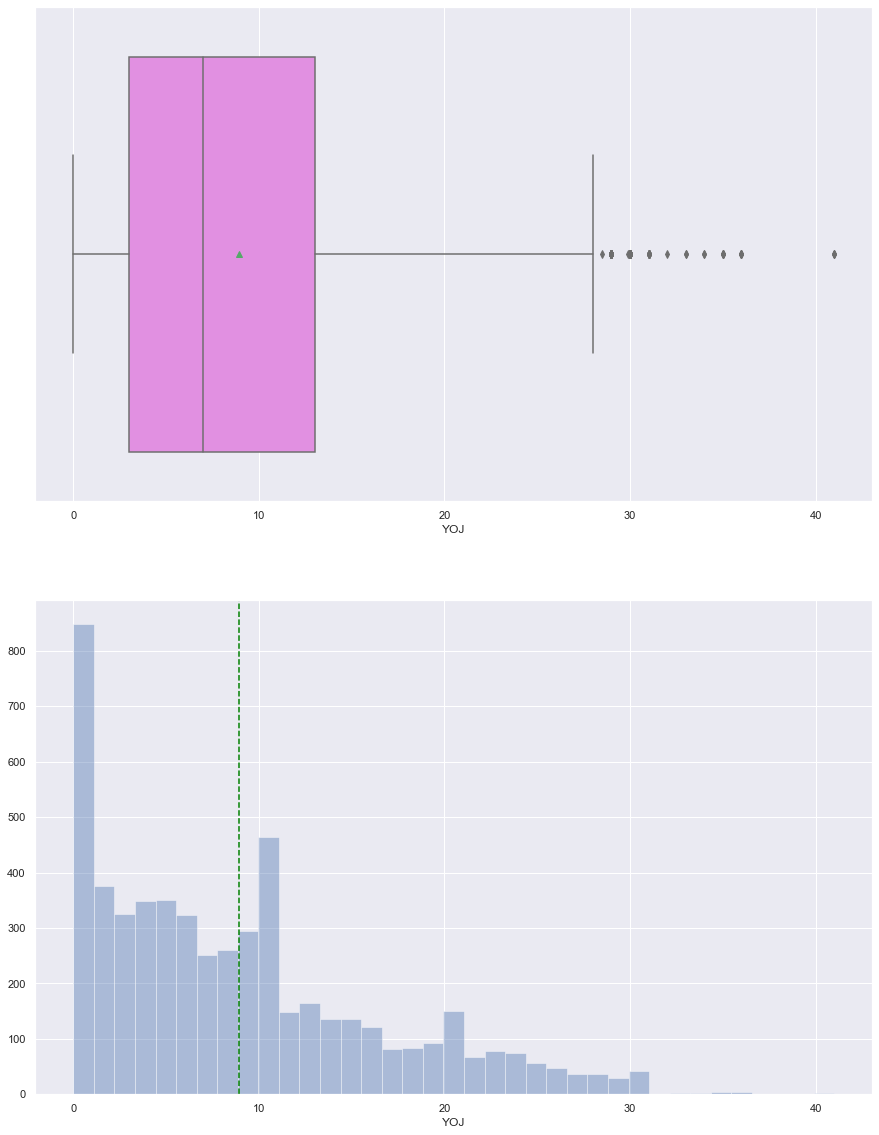

In [23]:
print('Skew :',round(data['YOJ'].skew(), 2))
histogram_boxplot(data['YOJ'])

Skew : 5.32


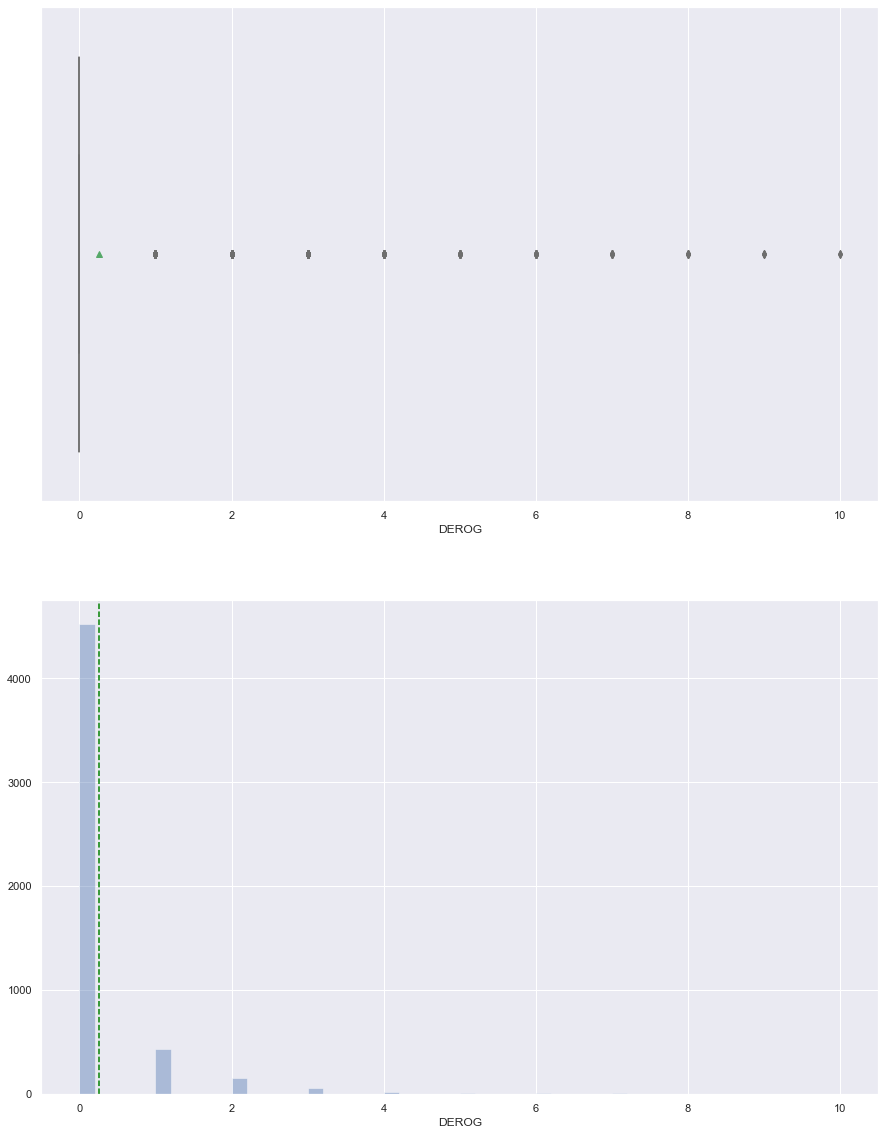

In [24]:
print('Skew :',round(data['DEROG'].skew(), 2))
histogram_boxplot(data['DEROG'])

Skew : 4.02


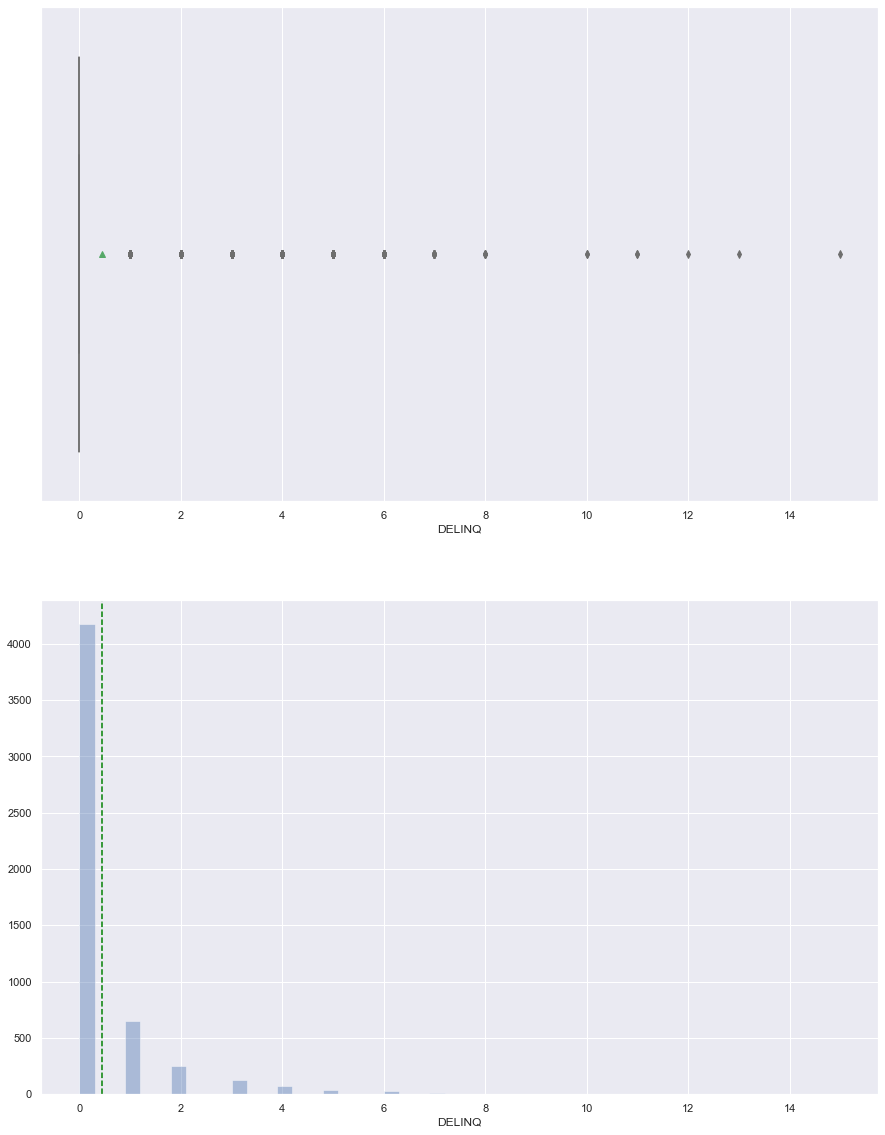

In [25]:
print('Skew :',round(data['DELINQ'].skew(), 2))
histogram_boxplot(data['DELINQ'])

Skew : 1.34


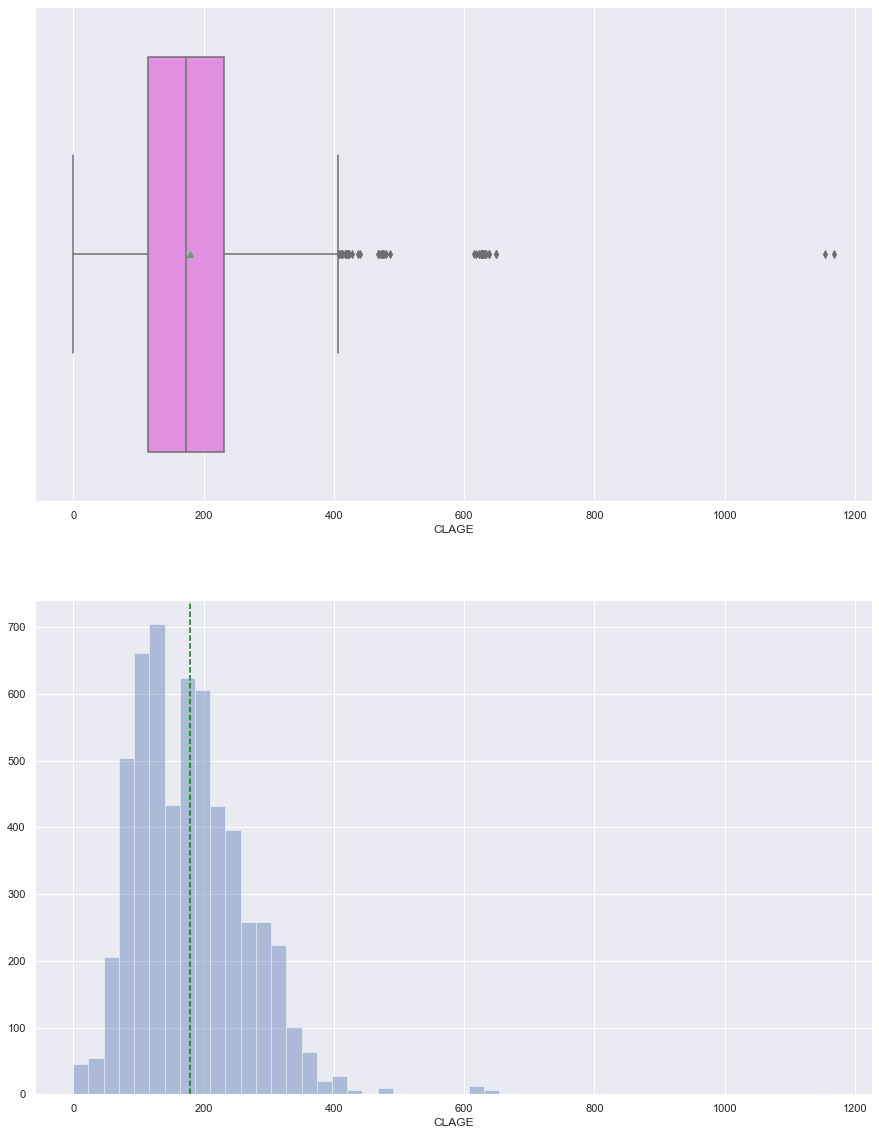

In [26]:
print('Skew :',round(data["CLAGE"].skew(), 2))
histogram_boxplot(data['CLAGE'])

Skew : 2.62


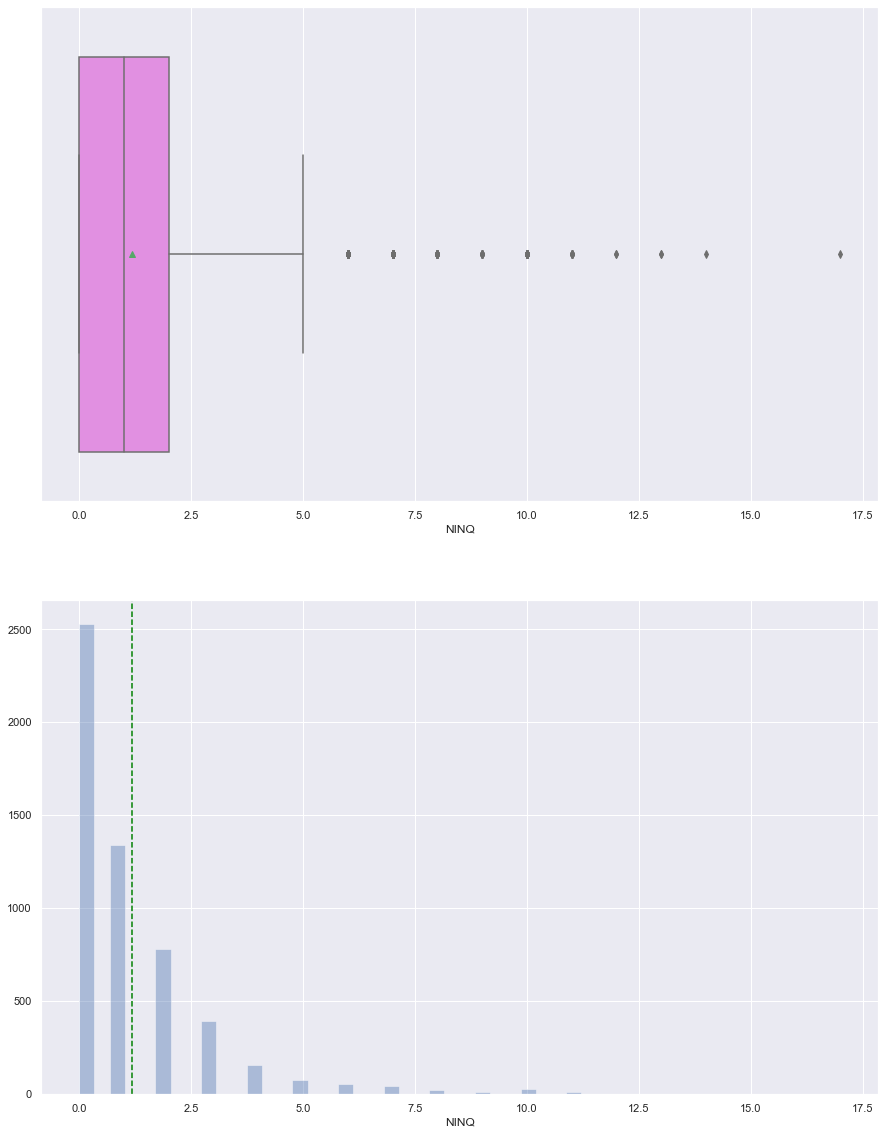

In [27]:
print('Skew :',round(data['NINQ'].skew(), 2))
histogram_boxplot(data['NINQ'])

Skew : 0.78


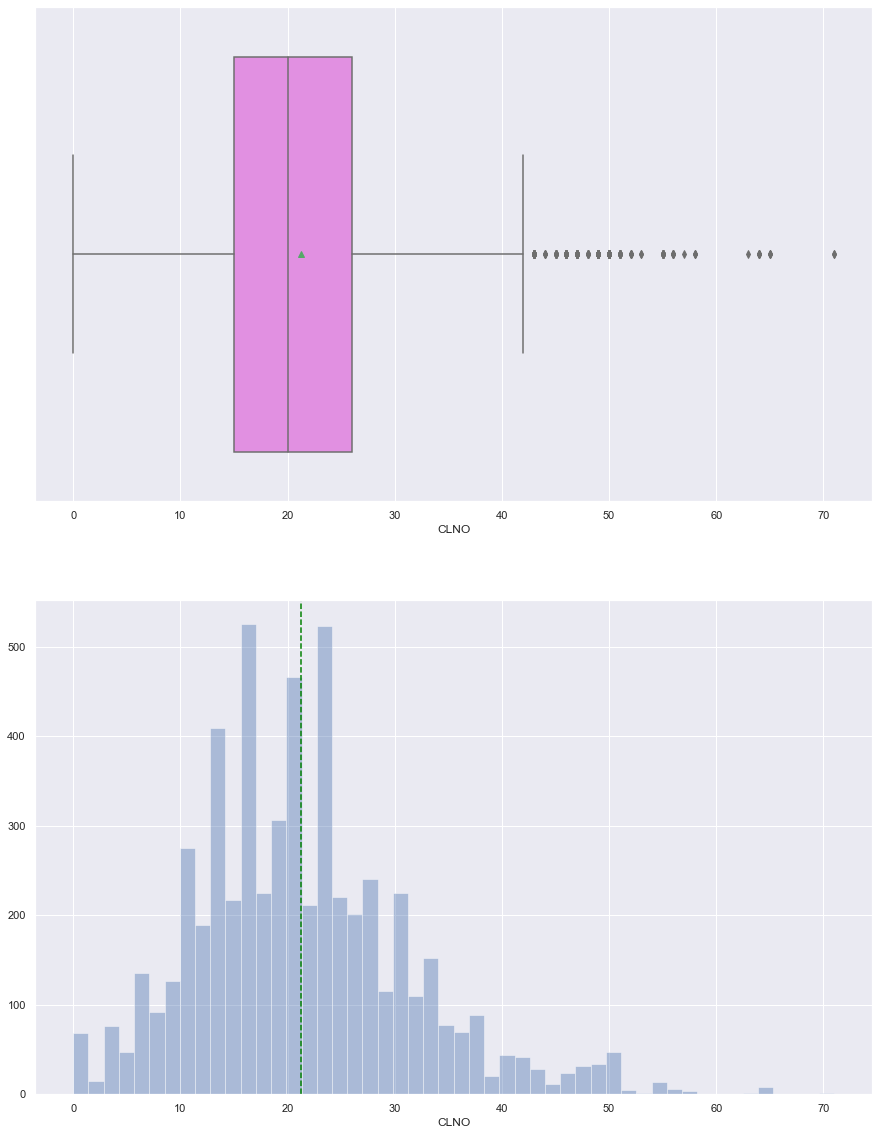

In [28]:
print('Skew :',round(data['CLNO'].skew(), 2))
histogram_boxplot(data['CLNO'])

Skew : 2.85


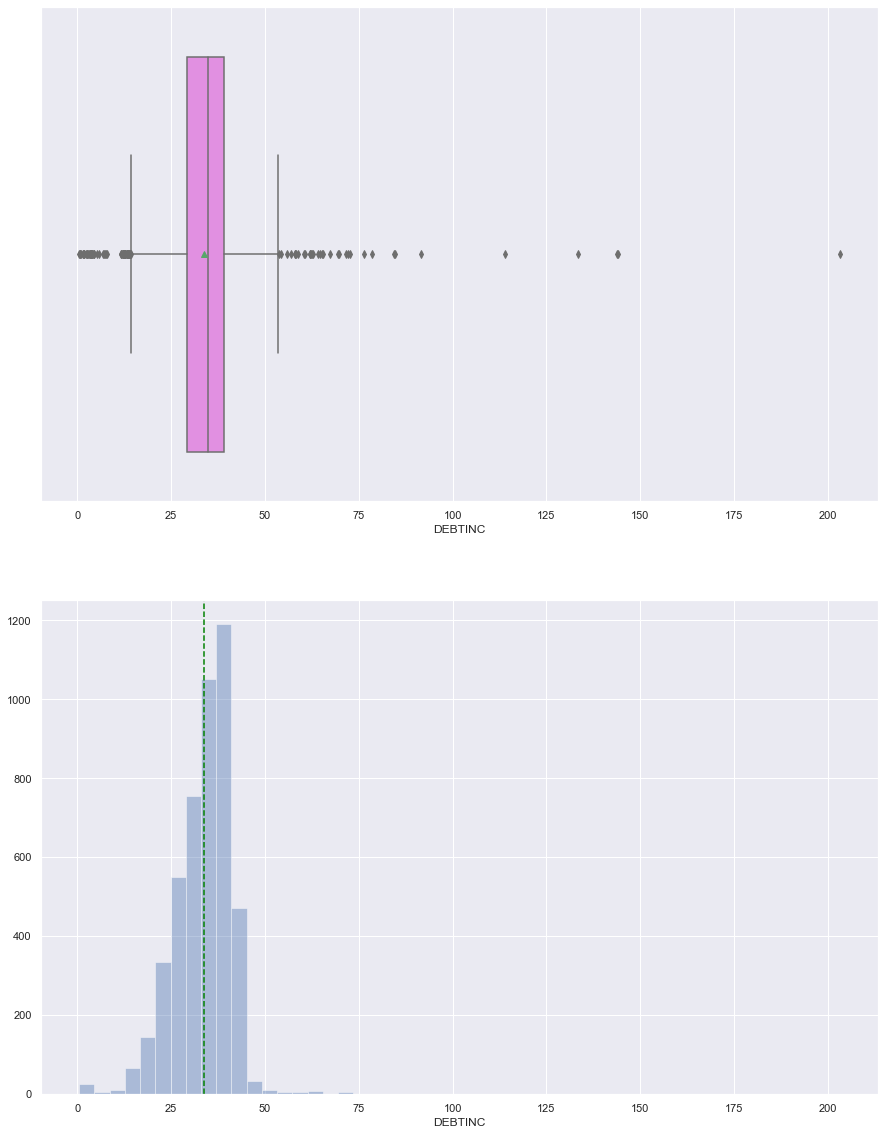

In [29]:
print('Skew :', round(data['DEBTINC'].skew(), 2))
histogram_boxplot(data['DEBTINC'])

**Insights <br>**
<ul>
    <li> DEBTINC: It has a lot of outliers on both ends of the boxplot. The median and the mean almost coincide with each other as seen in the box plot. There is still a high positive skew of 2.85. This is because of the large number of outliers in the data. Majority of the people have a debt-to-income ratio between 20 and 55, while the most frequently occurring debt to income ratio is around 35 which is also near the median.
    <li> CLNO: It has several outliers beyond 42. The mean is slightly greater than the median and are near each other. There is a positive skew of 0.78. The IQR is between 15 and 27 comprising of the most frequently occurring number of credit lines (i.e. CLNO)
    <li> NINQ: It also has several outliers beyond 5.0. Mean is slightly greater than the median but very near to it. There is a skew of 2.62. Q2 lies at 0.0, indicating that the first 25% of the data is 0. BY observing the distplot, it is evident that the values are discrete and not continuous, with 0.0 being the most frequently occurring value. Majority of the people have less than 2.5 number of recent queries.
    <li> CLAGE: It also has several outliers beyond 400 going upto 1200. Mean and median almost coincide with each other. But still there's a skew of 1.34. 
    <li> DELINQ: It has discrete values with 0 being the most frequently occurring value. The boxplot shows that more than 75% of the data is 0. It has several outliers due to which the mean is around 0.45. Mean is much greater than the median. Therefore there is a large positive skew of 4.02. This indicates that most people have 0 delinquent credit lines. The data is imbalanced.
    <li> DEROG: It has discrete values with 0 being the most frequently occurring value. The boxplot shows that more than 75% of the data is 0. The mean is greater than the median and there are several outliers. Therefore, there is a very large positive skew of 5.32. This implies that most people don't have any major derogatory reports indicating serious delinquency.
    <li> YOJ: As shown in the distplot, 0 is the most frequently occurring value. As the value of YOJ increases, the frequency of the particular value decreases, as is evident in the displot. Most people have 10 or below years of experience at the current job. In the boxplot, mean is greater than the median. There are also several outliers beyond 28. There is a skew of 0.99.
     <li> VALUE: As seen in the boxplot, the mean is slightly greater than the median, but there are a lot of outliers with extremely high values. The value of the current property is less than 2,00,000, for majority of the people.
     <li> MORTDUE: Also shows the same pattern as the VALUE column.
</ul>

### **2. Univariate Analysis - Categorical Data**

In [30]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(feature, data):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    
    fig, ax = plt.subplots(figsize=(15,10))
    sns.countplot(x=feature, data=data)
    total = len(data[feature]) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

<AxesSubplot:xlabel='DELINQ', ylabel='count'>

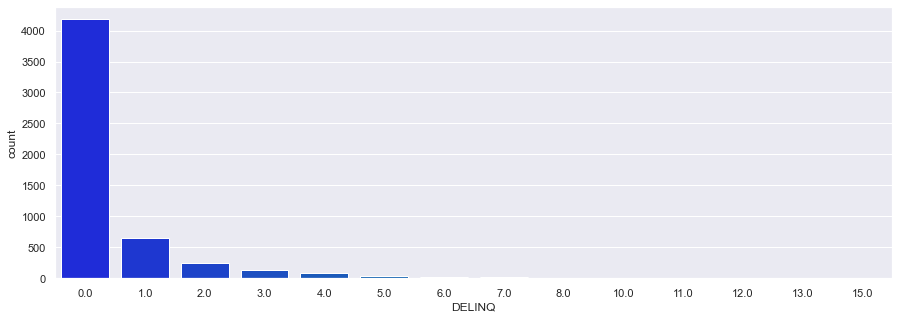

In [31]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
sns.countplot(x = 'DELINQ', data=data, palette='winter')


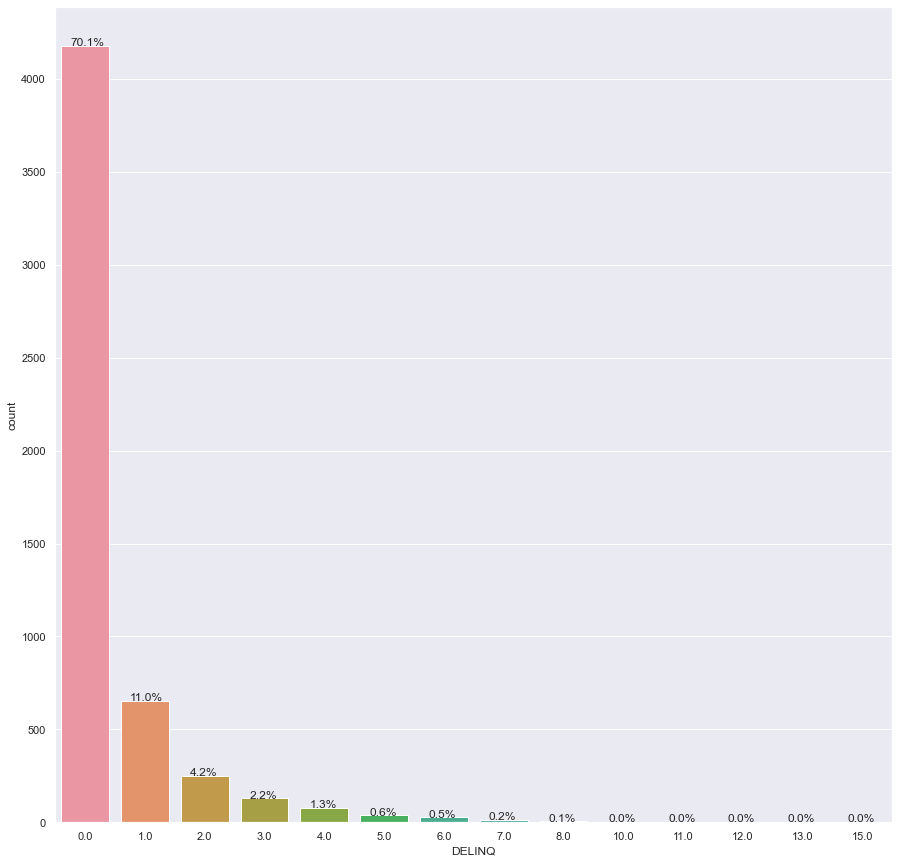

In [32]:
feature=data['DELINQ']
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(x='DELINQ', data=data)
total = len(feature) # length of the column
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
    x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
    y = p.get_y() + p.get_height()           # height of the plot
    ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
plt.show() # show the plot

**Insights <br>**
0 is the most frequently occurring value, comprising 70% of the data. This is highly imbalanced. This implies that most people don't have delinquent credit lines. There are very few people having large number of delinquencies.

In [33]:
cat_cols = data[['BAD', 'REASON', 'JOB', 'NINQ', 'DELINQ', 'DEROG']]
cat_cols

BAD   REASON     JOB  NINQ  DELINQ  DEROG
0      1  HomeImp   Other   1.0     0.0    0.0
1      1  HomeImp   Other   0.0     2.0    0.0
2      1  HomeImp   Other   1.0     0.0    0.0
3      1      NaN     NaN   NaN     NaN    NaN
4      0  HomeImp  Office   0.0     0.0    0.0
...   ..      ...     ...   ...     ...    ...
5955   0  DebtCon   Other   0.0     0.0    0.0
5956   0  DebtCon   Other   0.0     0.0    0.0
5957   0  DebtCon   Other   0.0     0.0    0.0
5958   0  DebtCon   Other   0.0     0.0    0.0
5959   0  DebtCon   Other   0.0     0.0    0.0

[5960 rows x 6 columns]

--------------------:BAD:-------------------------


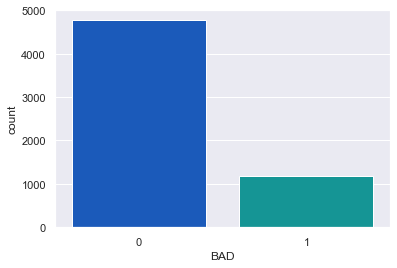

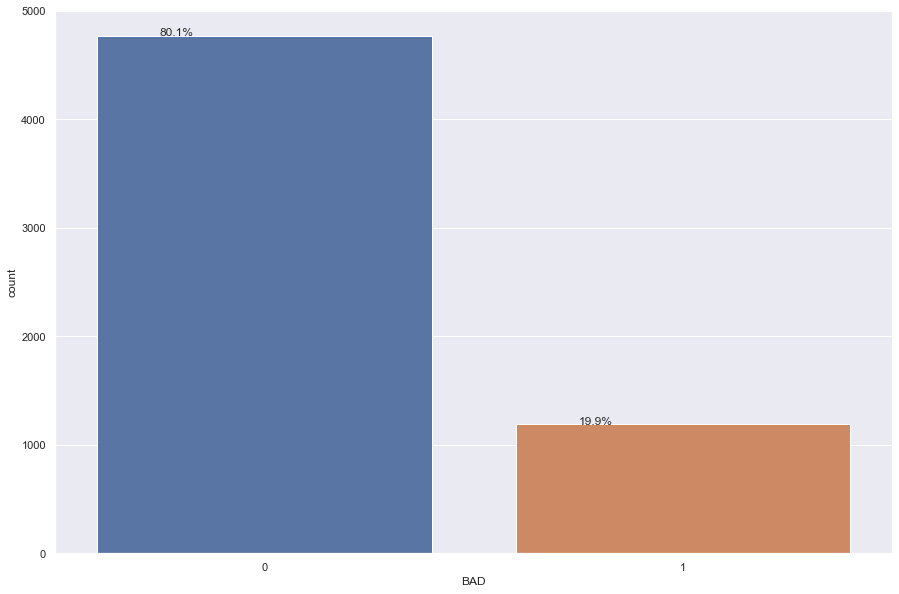

--------------------:REASON:-------------------------


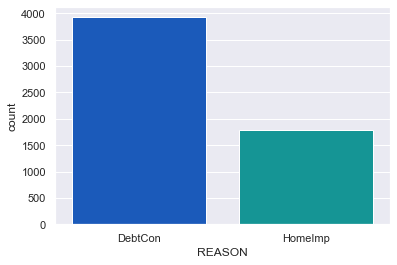

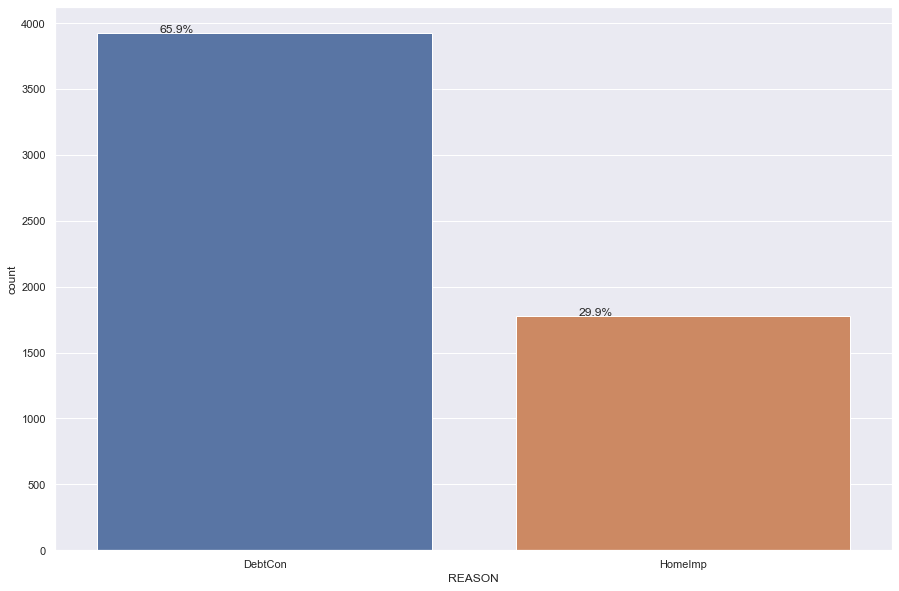

--------------------:JOB:-------------------------


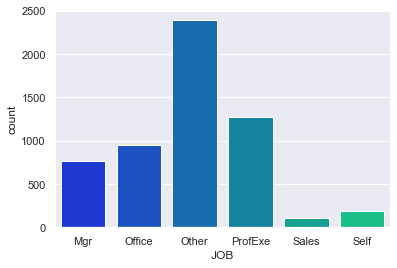

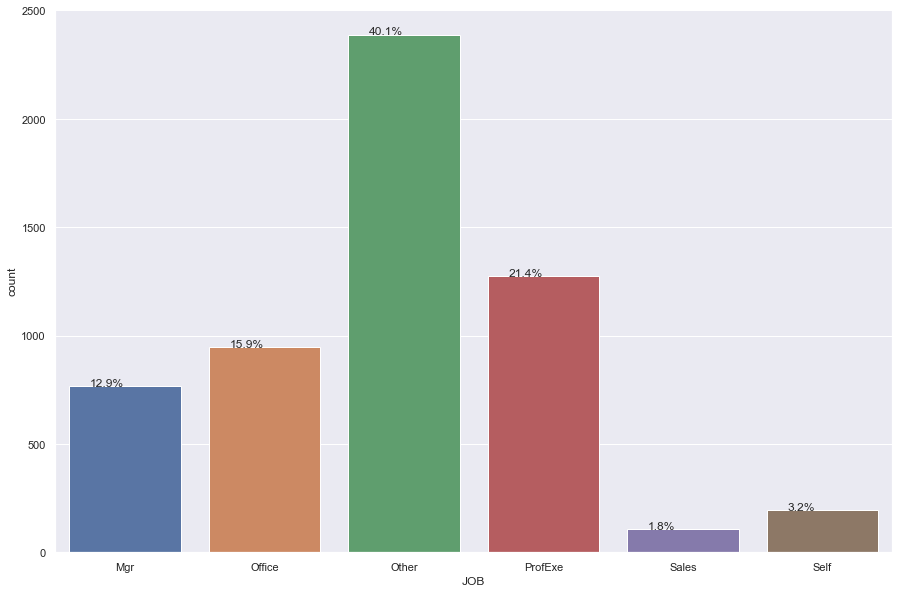

--------------------:NINQ:-------------------------


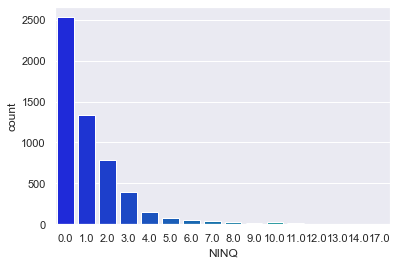

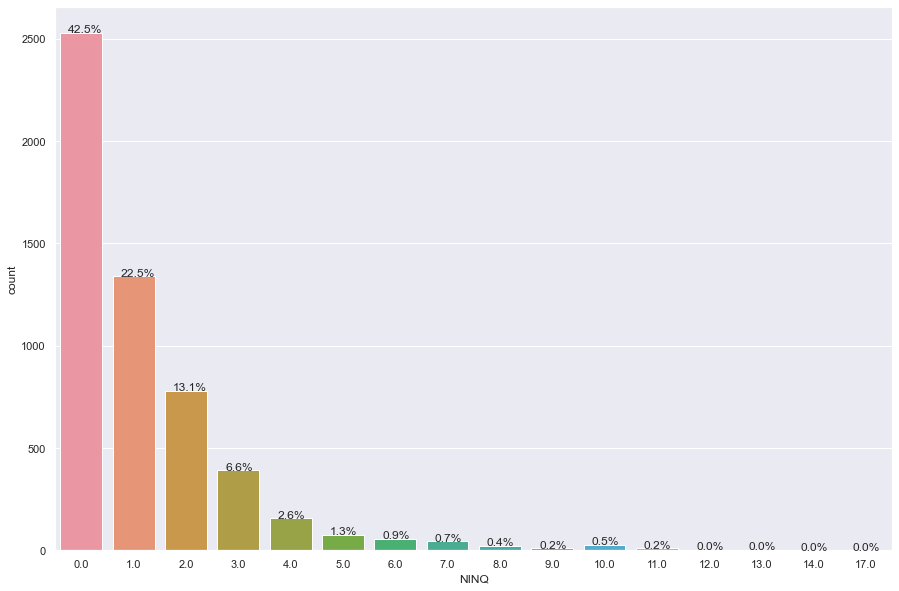

--------------------:DELINQ:-------------------------


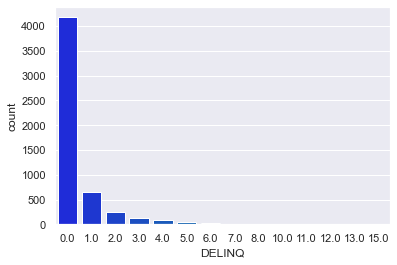

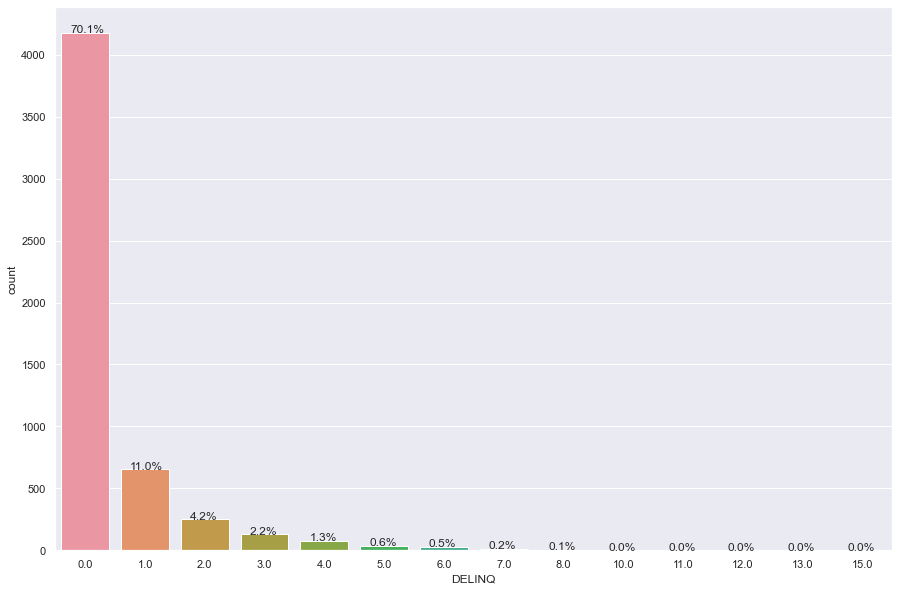

--------------------:DEROG:-------------------------


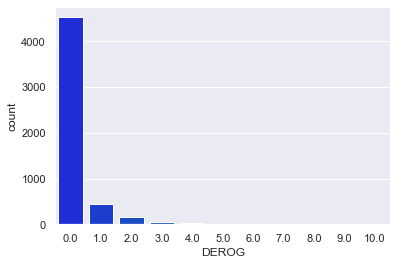

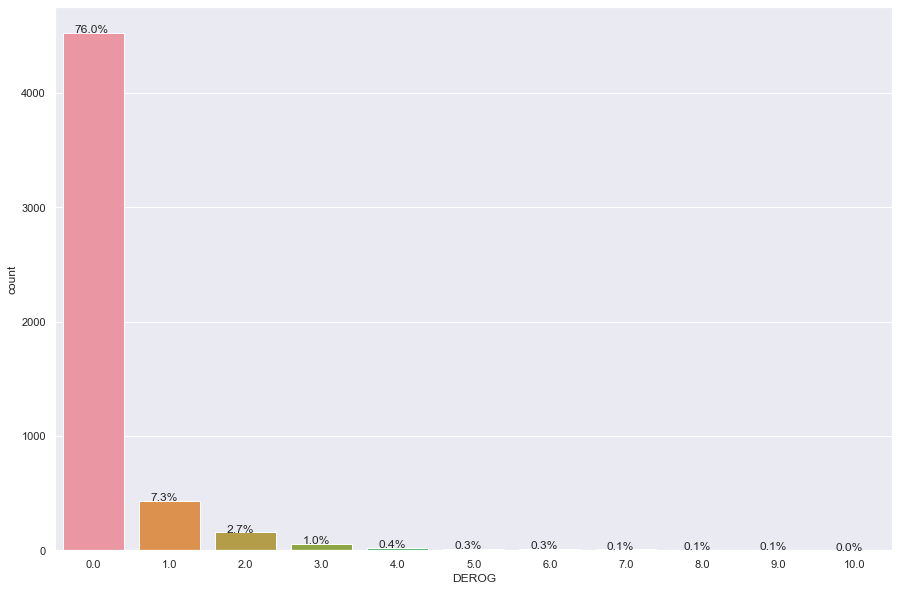

In [34]:
for cols in cat_cols.columns:
    print(f'--------------------:{cols}:-------------------------')
    sns.countplot(x = cols, data=data, palette='winter')
    perc_on_bar(cols, data)

**Insights <br>**
<ul>
    <li> BAD: 80% of the data is 0 and 20% is 1. Therefore there is a large imbalance. There are few people who have defaulted on their loans.
    <li> REASON: 65.9% of the data is DebtCon and the rest is HomeImp, which implies a large majority of people take out loan for debt consolidation (paying off their liabilities). The other reason for loans in this dataset is Home Improvement which is only 29.9%.
    <li> JOB: Most people (40%) are in 'Other'. 21.4% people are Professional Executives. Only 1.8% people are in Sales and 3.2% are Self employed.
    <li> NINQ: 42.5% is 0. Therefore, a large majority of people have no recent inquiries. Around 80% of the people have less than 4 inquiries.
    <li> DEROG: 76% of the people have 0 serious delinquencies.
</ul>

## **Bivariate Analysis**
**Bivariate Analysis: Continuous and Categorical Variables**
#### Analyze BAD vs Loan

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

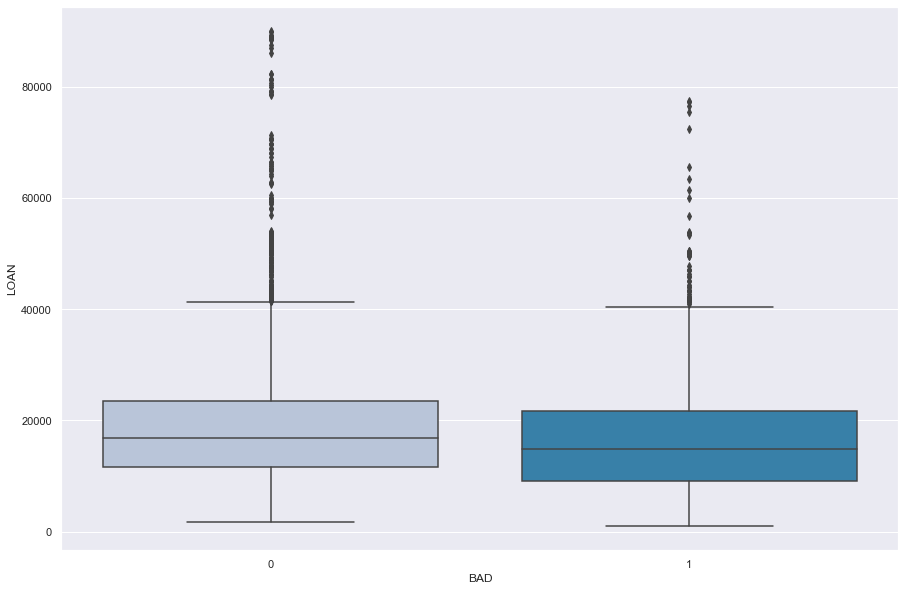

In [35]:
plt.figure(figsize=(15,10))
sns.boxplot(x="BAD", y="LOAN", data=data, palette="PuBu")
#sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

**Insights <br>**
As shown above, there is no big difference in LOAN amounts between delinquent and non delinquent clients. However, the delinquent clients seem to have mean and median of LOAN amount slightly less than that of non deliqnuent ones.

<AxesSubplot:xlabel='BAD', ylabel='DEROG'>

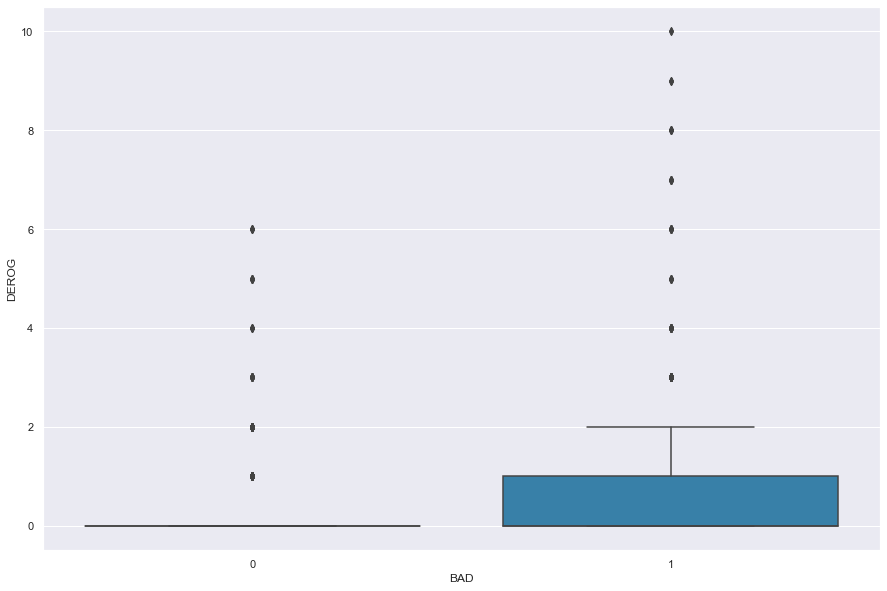

In [36]:
plt.figure(figsize=(15,10))
sns.boxplot(x="BAD", y="DEROG", data=data, palette="PuBu")

As shown in the above boxplot, people who have a number of major derogatory reports indicating serious delinquencies are the ones who default on their loans as well. The clients who don't default on their loans mostly have 0 derogatory reports. Therefore, it can be inferred that if the number of derogatory reports for a client is greater than 0, then there is a high likelihood that the client will defulault on their loan.

<AxesSubplot:xlabel='BAD', ylabel='DELINQ'>

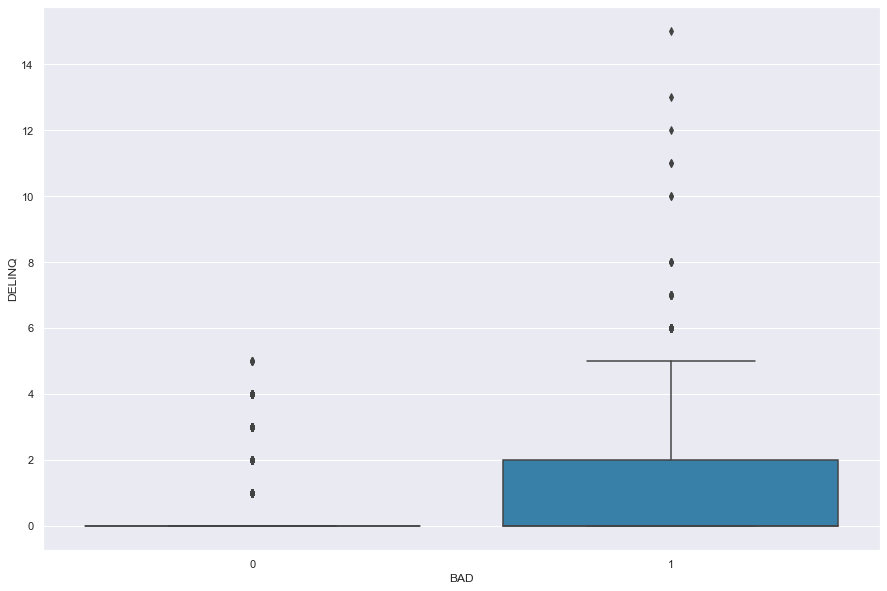

In [37]:
plt.figure(figsize=(15,10))
sns.boxplot(x="BAD", y="DELINQ", data=data, palette="PuBu")

Similar, to the case with the number of derogatory reports, a client who has 1 or more delinquent credit lines has a much higher likelihood of defaulting on their loan.

<AxesSubplot:xlabel='BAD', ylabel='DEBTINC'>

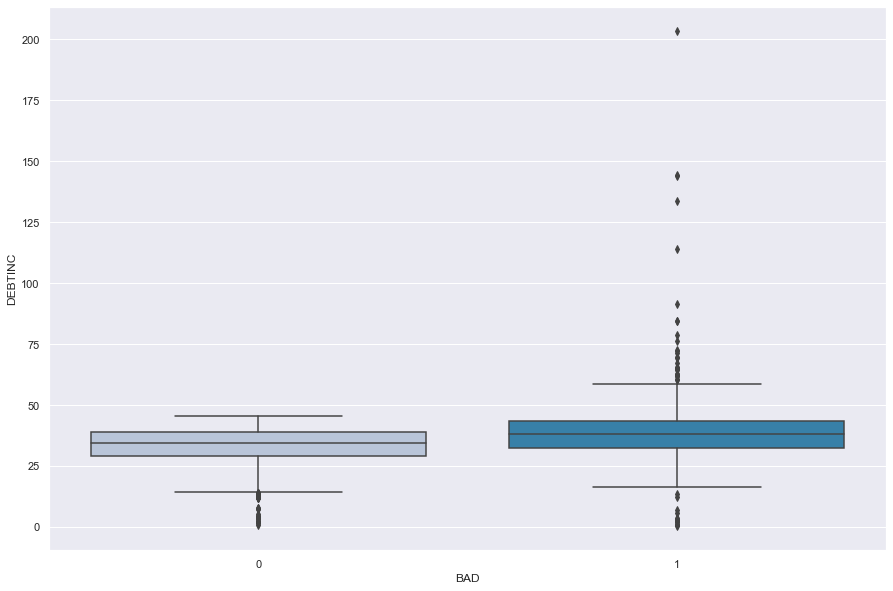

In [38]:
plt.figure(figsize=(15,10))
sns.boxplot(x="BAD", y="DEBTINC", data=data, palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='NINQ'>

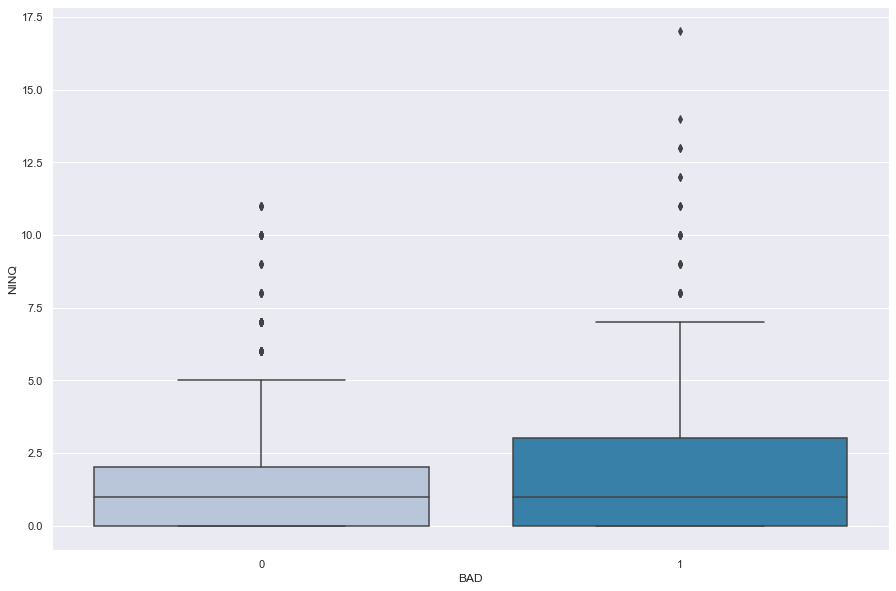

In [39]:
plt.figure(figsize=(15,10))
sns.boxplot(x="BAD", y="NINQ", data=data, palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='CLAGE'>

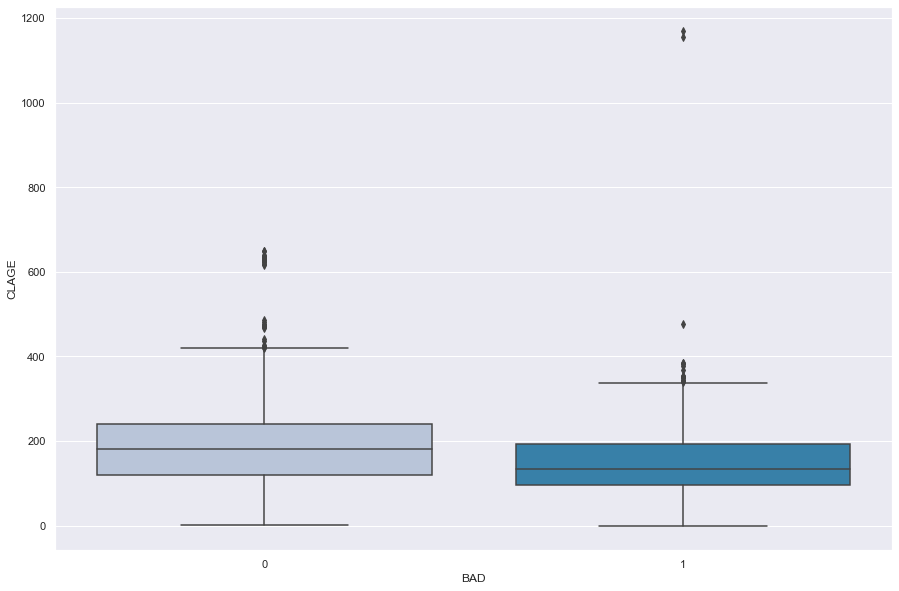

In [40]:
plt.figure(figsize=(15,10))
sns.boxplot(x="BAD", y="CLAGE", data=data, palette="PuBu")

<AxesSubplot:xlabel='JOB', ylabel='LOAN'>

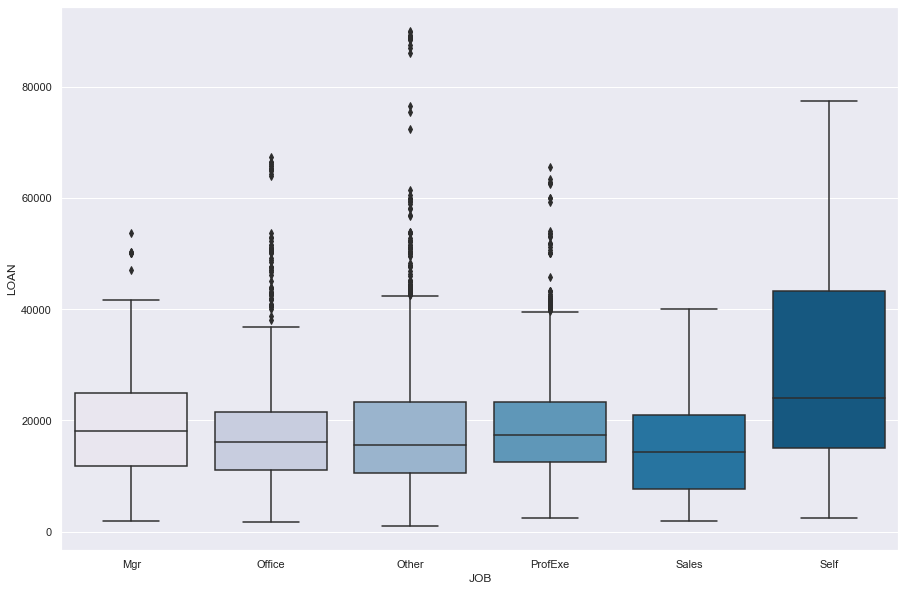

In [41]:
plt.figure(figsize=(15,10))
sns.boxplot(x="JOB", y="LOAN", data=data, palette="PuBu")

It is evident from the above boxplot, that Self employed people tend to take loans of much higher amounts than others

<AxesSubplot:xlabel='REASON', ylabel='LOAN'>

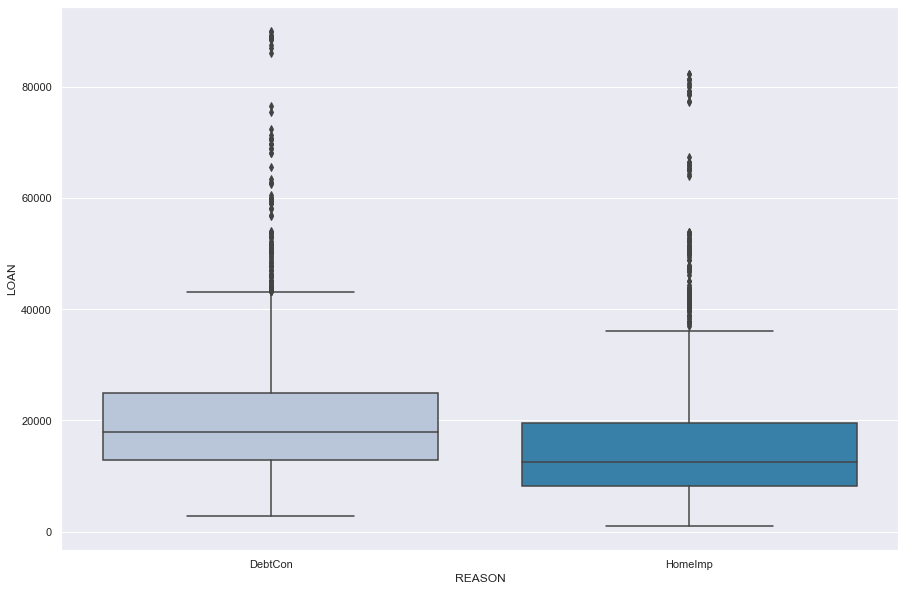

In [42]:
plt.figure(figsize=(15,10))
sns.boxplot(x="REASON", y="LOAN", data=data, palette="PuBu")

As seen above, loans taken out for Debt Consolidation tend to be higher than the loans taken out for Home Improvement purposes.

### **Bivariate Analysis: Two Continuous Variables**

In [43]:
cont_cols = data.select_dtypes(exclude='category')
cont_cols = pd.concat([cont_cols, data['BAD']], axis=1)
cont_cols

LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0      1100  25860.0   39025.0  10.5    0.0     0.0   94.366667   1.0   9.0   
1      1300  70053.0   68400.0   7.0    0.0     2.0  121.833333   0.0  14.0   
2      1500  13500.0   16700.0   4.0    0.0     0.0  149.466667   1.0  10.0   
3      1500      NaN       NaN   NaN    NaN     NaN         NaN   NaN   NaN   
4      1700  97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0  14.0   
...     ...      ...       ...   ...    ...     ...         ...   ...   ...   
5955  88900  57264.0   90185.0  16.0    0.0     0.0  221.808718   0.0  16.0   
5956  89000  54576.0   92937.0  16.0    0.0     0.0  208.692070   0.0  15.0   
5957  89200  54045.0   92924.0  15.0    0.0     0.0  212.279697   0.0  15.0   
5958  89800  50370.0   91861.0  14.0    0.0     0.0  213.892709   0.0  16.0   
5959  89900  48811.0   88934.0  15.0    0.0     0.0  219.601002   0.0  16.0   

        DEBTINC BAD  
0           NaN   1  
1           NaN   1  
2           NaN   1  
3           NaN   1  
4           NaN   0  
...         ...  ..  
5955  36.112347   0  
5956  35.859971   0  
5957  35.556590   0  
5958  34.340882   0  
5959  34.571519   0  

[5960 rows x 11 columns]

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

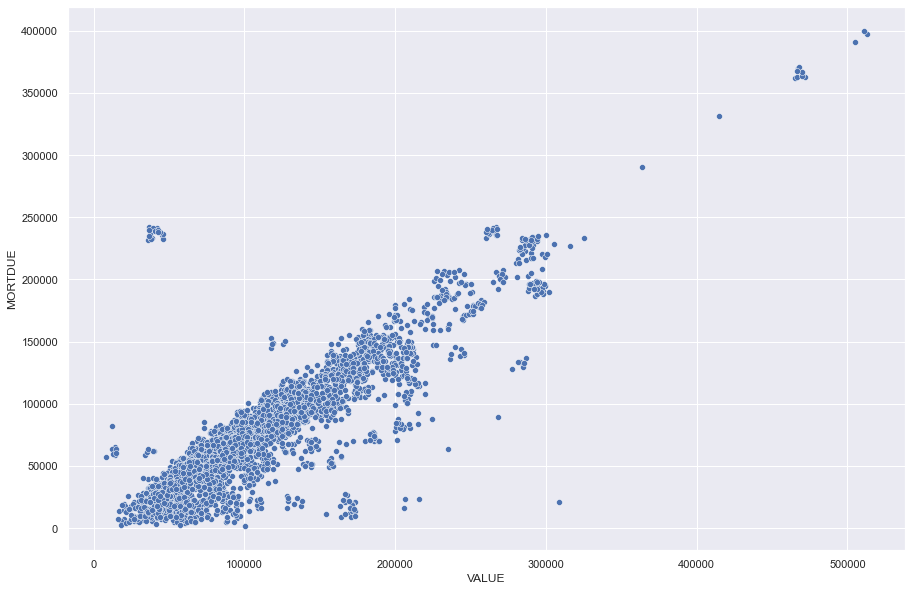

In [44]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=data["VALUE"],y=data['MORTDUE'],palette="PuBu")

**Insights: <br>**
The positive correlation between MORTDUE and VALUE is very large. This makes sense, because the higher the value of the current property, the more likely it is that the mount of existing mortage will be higher. But this is a case of Multicollinearity, which is not good for training a machine learning model, especially when the model assumes that the input variables are independent. We might need to drop one of the columns before we input it into a Machine Learning model.

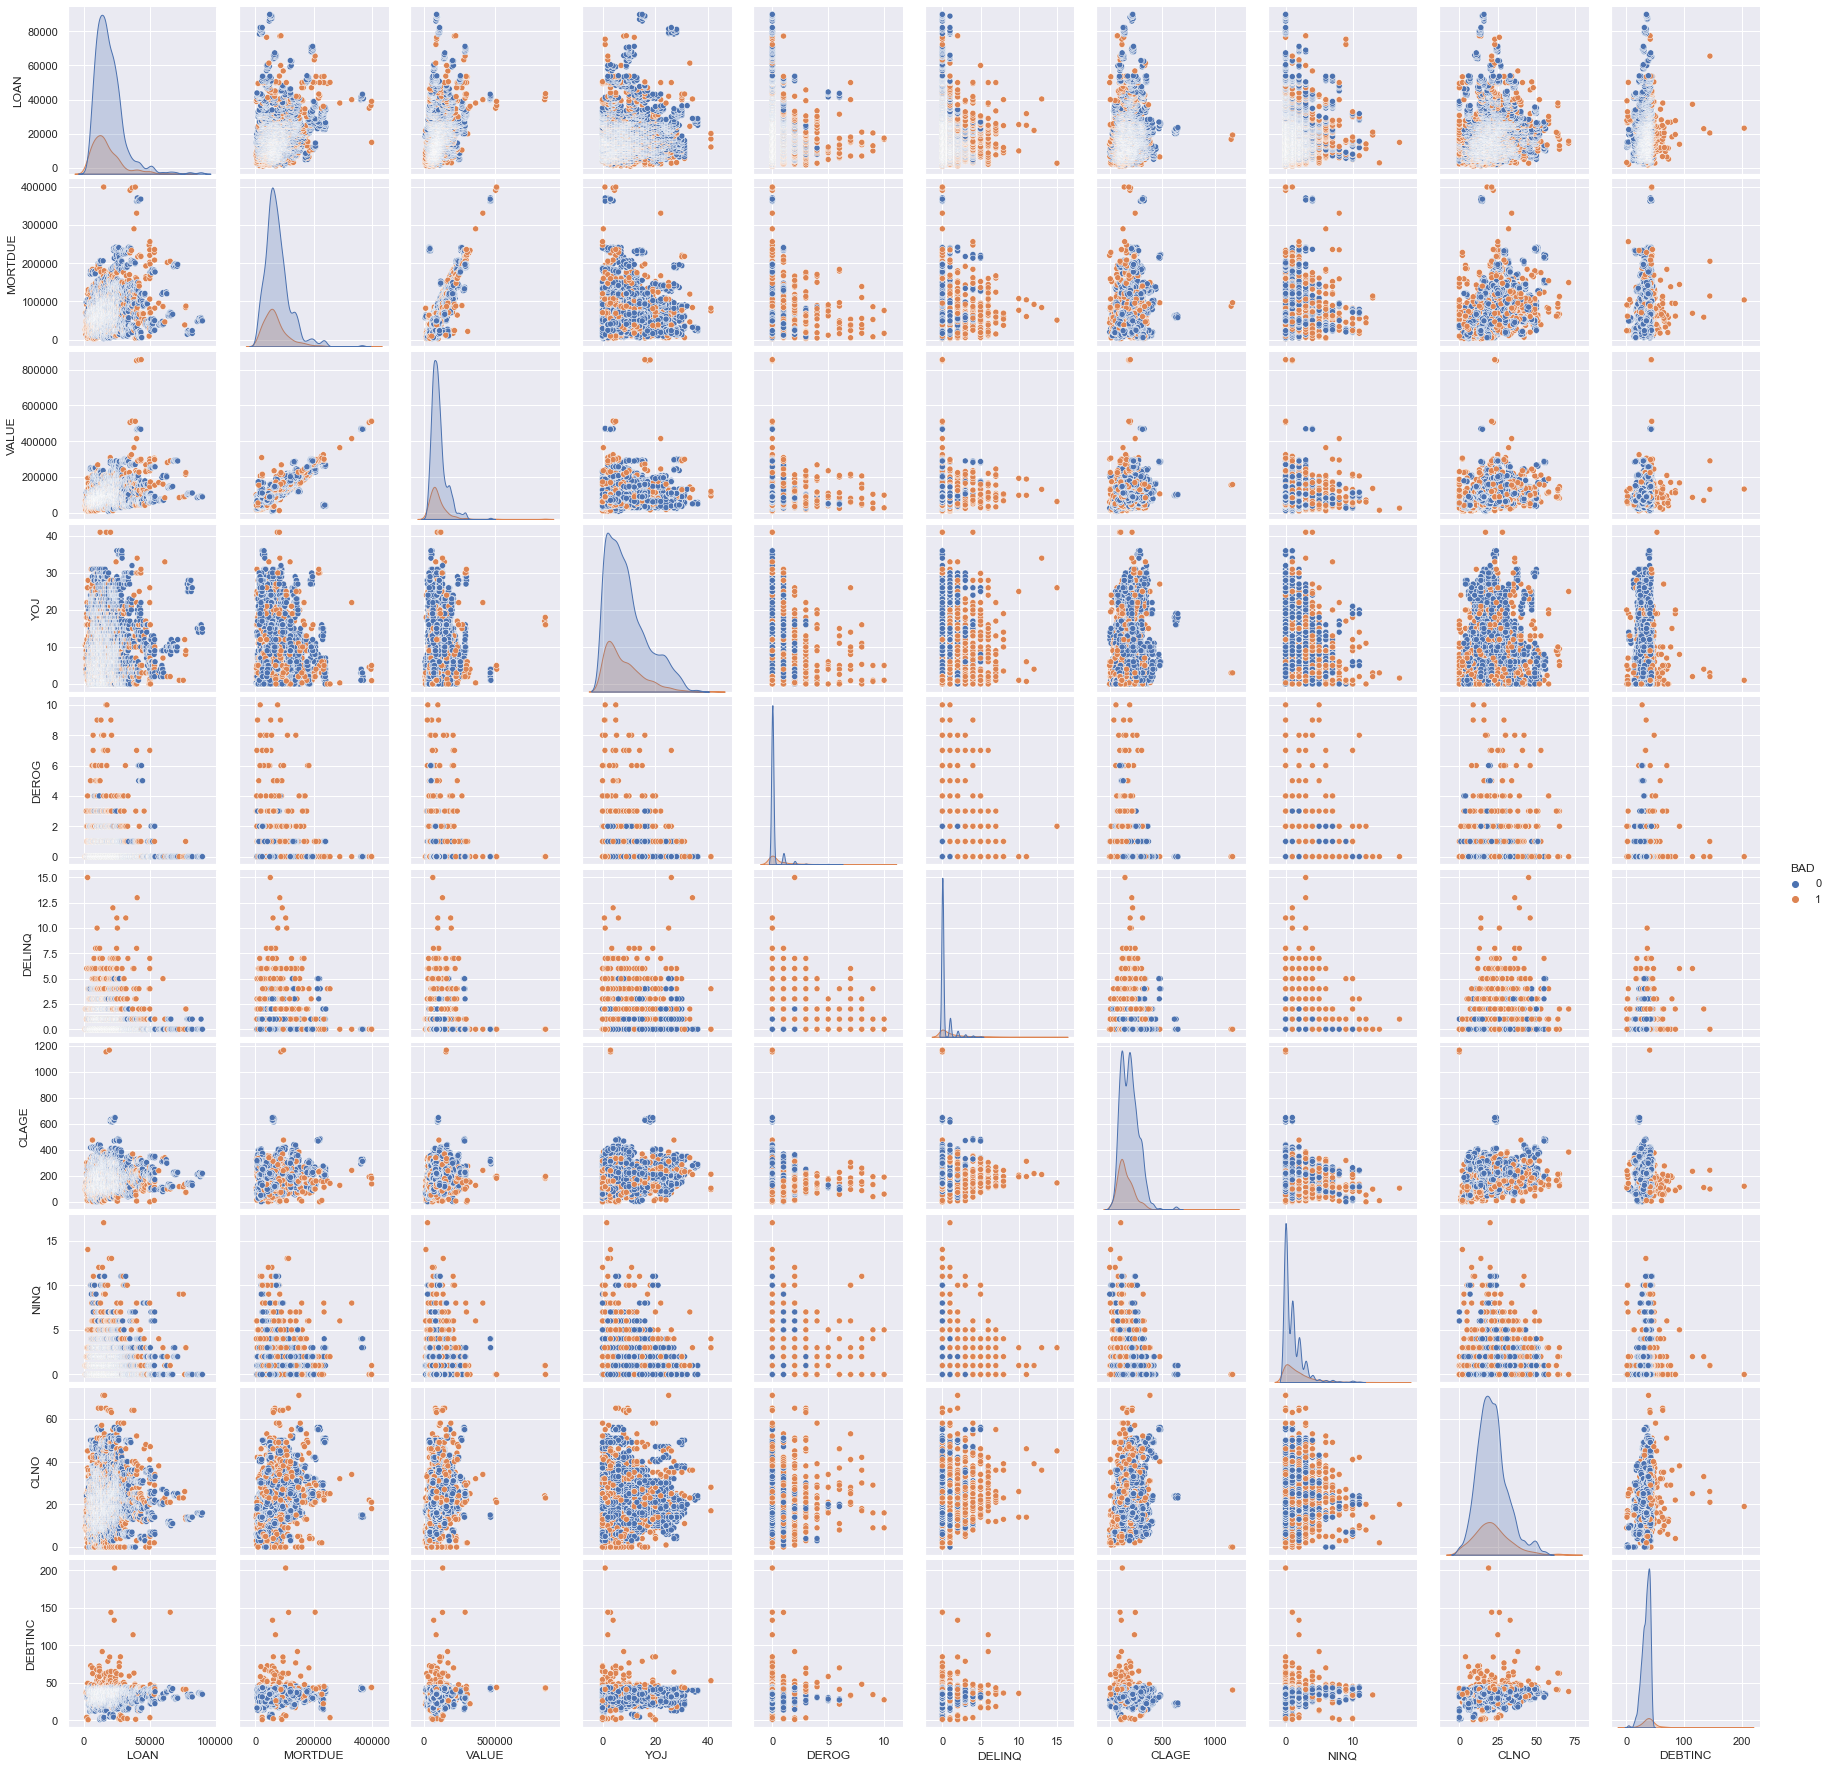

In [45]:
sns.pairplot(cont_cols, diag_kind='kde', hue='BAD')

The value and mortdue show high positive correlation of 0.88. Value and Loan also show mildly positive correlation of 0.34. MortDue and CLNO also show mild correlation of 0.32.

<AxesSubplot:xlabel='VALUE', ylabel='LOAN'>

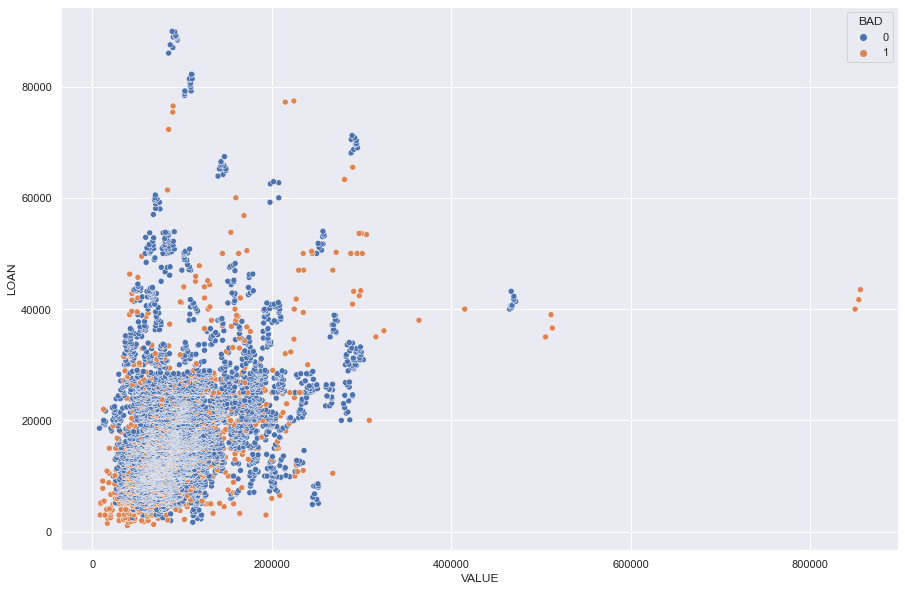

In [46]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=data["VALUE"],y=data['LOAN'], hue=data['BAD'])

**Insights <br>**
<ul>
    <li> It is evident from the above pairplot, that Value and MORTDUE show significant positive correlation with each other.
    <li> Value and Loan also show mildly positive correlation.
    <li> None of the other independent variables seem to show significant correlation with each other.
</ul>

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [47]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


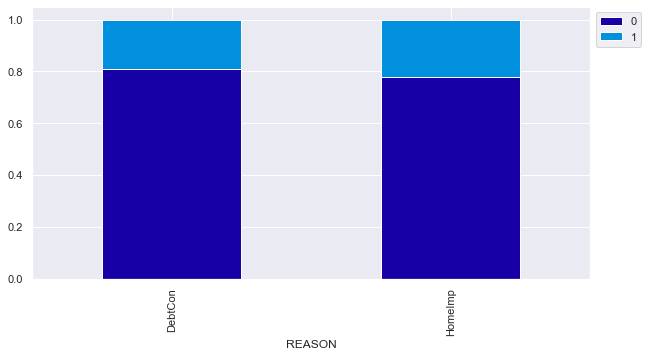

In [48]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights <br>**
Loans taken out for Home Improvement show a slightly higher proportion of delinquencies than those for Debt Consolidation. But this difference is not very significant.

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


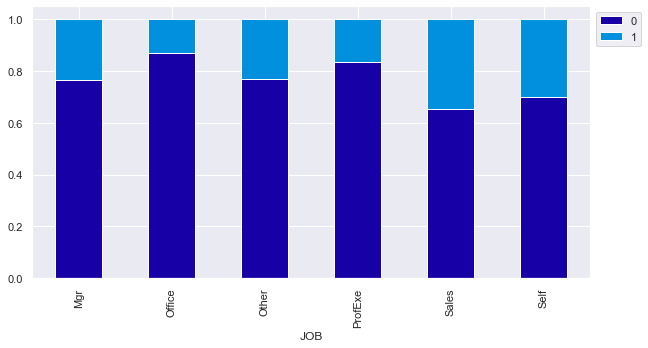

In [49]:
stacked_plot(data['JOB'])

BAD      0     1   All
NINQ                  
0.0   2135   396  2531
1.0   1085   254  1339
2.0    599   181   780
3.0    285   107   392
4.0     95    61   156
5.0     39    36    75
6.0     27    29    56
7.0     29    15    44
8.0     11    11    22
9.0      5     6    11
10.0    19     9    28
11.0     7     3    10
12.0     0     2     2
13.0     0     2     2
14.0     0     1     1
17.0     0     1     1
All   4336  1114  5450
------------------------------------------------------------------------------------------------------------------------


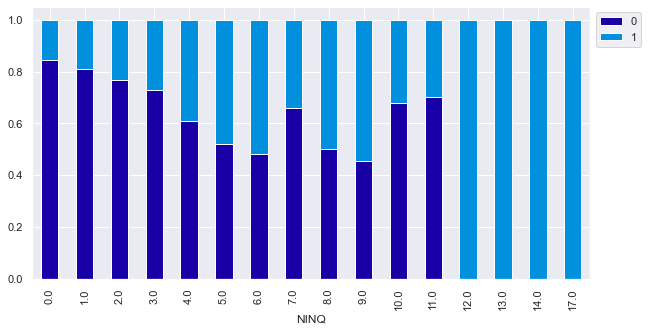

In [50]:
stacked_plot(data['NINQ'])

BAD        0     1   All
DELINQ                  
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
All     4263  1117  5380
------------------------------------------------------------------------------------------------------------------------


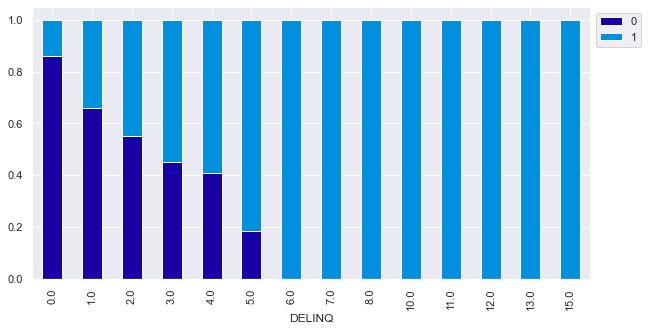

In [51]:
stacked_plot(data['DELINQ'])

BAD       0     1   All
DEROG                  
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
5.0       8     7    15
6.0       5    10    15
7.0       0     8     8
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
All    4150  1102  5252
------------------------------------------------------------------------------------------------------------------------


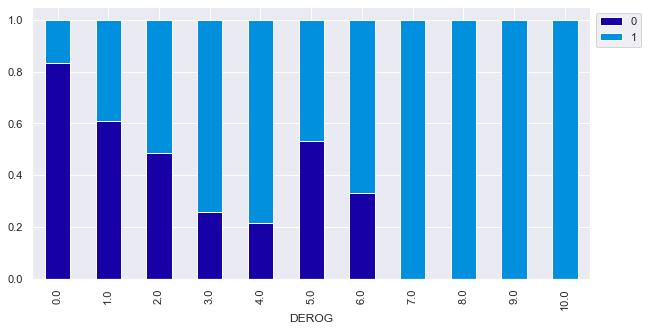

In [52]:
stacked_plot(data['DEROG'])

**Insights <br>**
<ul>
    <li> NINQ: When Number of inquiries exceed 11, then the proportion of delinquent clients increases drastically. This can be one of the key features to predict loan default.
    <li> DELINQ: When the number of delinquent credit lines are equal to 4.0 or 5.0 then there is a high likelihood of defaulting on the loan. But when it exceeds 5.0, all such clients are loan defaulters.
    <li> DEROG: When it exceeds 6.0, then there is high chance of loan default, since all such clients are defaulters
</ul>

### **Multivariate Analysis**
#### Analyze Correlation Heatmap for Numerical Variables

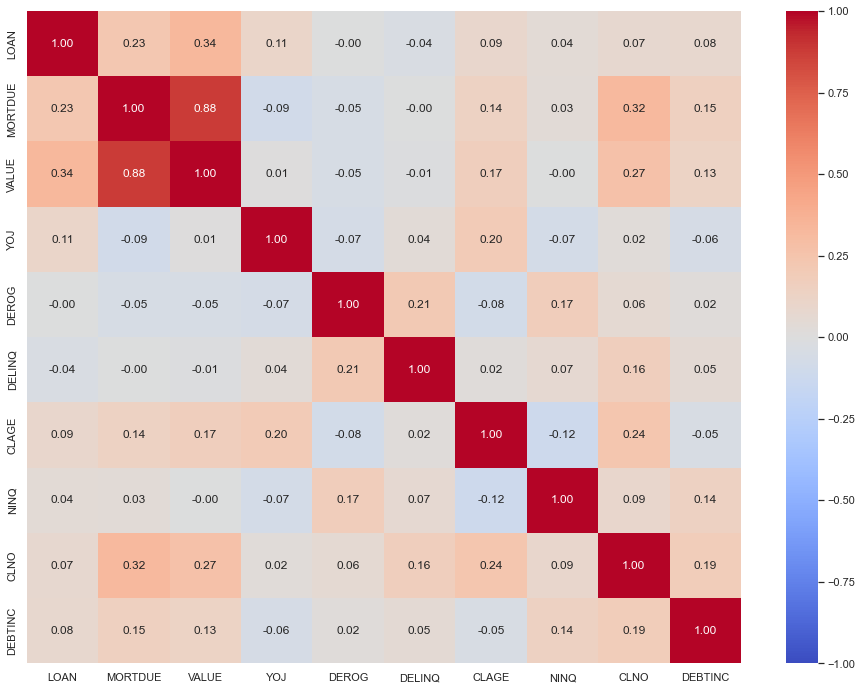

In [53]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
# Remove ___________ and complete the code

corr = data[numerical_col].corr()

# plot the heatmap
# Remove ___________ and complete the code

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True);

<b>Treat Outliers</b>

In [54]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1 = np.nanquantile(df[col], 0.25) # 25th quantile
    Q3 = np.nanquantile(df[col], 0.75)  # 75th quantile
    IQR = Q3 - Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df


In [55]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

In [56]:
numerical_col

['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [57]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category')#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
num_data = num_data.apply(lambda x: x.fillna(x.mean()), axis=0)

# Fill object columns with model.
# Remove _________ and complete the code
cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]), axis=0)

In [58]:
num_data.isnull().mean()

LOAN       0.0
MORTDUE    0.0
VALUE      0.0
YOJ        0.0
DEROG      0.0
DELINQ     0.0
CLAGE      0.0
NINQ       0.0
CLNO       0.0
DEBTINC    0.0
dtype: float64

In [59]:
cat_data.isnull().mean()

BAD       0.0
REASON    0.0
JOB       0.0
dtype: float64

In [60]:
cat_data

BAD   REASON     JOB
0      1  HomeImp   Other
1      1  HomeImp   Other
2      1  HomeImp   Other
3      1  DebtCon   Other
4      0  HomeImp  Office
...   ..      ...     ...
5955   0  DebtCon   Other
5956   0  DebtCon   Other
5957   0  DebtCon   Other
5958   0  DebtCon   Other
5959   0  DebtCon   Other

[5960 rows x 3 columns]

In [61]:
num_data

LOAN       MORTDUE          VALUE        YOJ  DEROG  DELINQ  \
0      1100.0  25860.000000   39025.000000  10.500000    0.0     0.0   
1      1300.0  70053.000000   68400.000000   7.000000    0.0     0.0   
2      1500.0  13500.000000   16700.000000   4.000000    0.0     0.0   
3      1500.0  71566.093752   98538.057633   8.873159    0.0     0.0   
4      1700.0  97800.000000  112000.000000   3.000000    0.0     0.0   
...       ...           ...            ...        ...    ...     ...   
5955  41600.0  57264.000000   90185.000000  16.000000    0.0     0.0   
5956  41600.0  54576.000000   92937.000000  16.000000    0.0     0.0   
5957  41600.0  54045.000000   92924.000000  15.000000    0.0     0.0   
5958  41600.0  50370.000000   91861.000000  14.000000    0.0     0.0   
5959  41600.0  48811.000000   88934.000000  15.000000    0.0     0.0   

           CLAGE      NINQ       CLNO    DEBTINC  
0      94.366667  1.000000   9.000000  33.681973  
1     121.833333  0.000000  14.000000  33.681973  
2     149.466667  1.000000  10.000000  33.681973  
3     178.635811  1.093394  21.032851  33.681973  
4      93.333333  0.000000  14.000000  33.681973  
...          ...       ...        ...        ...  
5955  221.808718  0.000000  16.000000  36.112347  
5956  208.692070  0.000000  15.000000  35.859971  
5957  212.279697  0.000000  15.000000  35.556590  
5958  213.892709  0.000000  16.000000  34.340882  
5959  219.601002  0.000000  16.000000  34.571519  

[5960 rows x 10 columns]

In [62]:
df_final = pd.concat([num_data, cat_data], axis = 1)
df_final

LOAN       MORTDUE          VALUE        YOJ  DEROG  DELINQ  \
0      1100.0  25860.000000   39025.000000  10.500000    0.0     0.0   
1      1300.0  70053.000000   68400.000000   7.000000    0.0     0.0   
2      1500.0  13500.000000   16700.000000   4.000000    0.0     0.0   
3      1500.0  71566.093752   98538.057633   8.873159    0.0     0.0   
4      1700.0  97800.000000  112000.000000   3.000000    0.0     0.0   
...       ...           ...            ...        ...    ...     ...   
5955  41600.0  57264.000000   90185.000000  16.000000    0.0     0.0   
5956  41600.0  54576.000000   92937.000000  16.000000    0.0     0.0   
5957  41600.0  54045.000000   92924.000000  15.000000    0.0     0.0   
5958  41600.0  50370.000000   91861.000000  14.000000    0.0     0.0   
5959  41600.0  48811.000000   88934.000000  15.000000    0.0     0.0   

           CLAGE      NINQ       CLNO    DEBTINC BAD   REASON     JOB  
0      94.366667  1.000000   9.000000  33.681973   1  HomeImp   Other  
1     121.833333  0.000000  14.000000  33.681973   1  HomeImp   Other  
2     149.466667  1.000000  10.000000  33.681973   1  HomeImp   Other  
3     178.635811  1.093394  21.032851  33.681973   1  DebtCon   Other  
4      93.333333  0.000000  14.000000  33.681973   0  HomeImp  Office  
...          ...       ...        ...        ...  ..      ...     ...  
5955  221.808718  0.000000  16.000000  36.112347   0  DebtCon   Other  
5956  208.692070  0.000000  15.000000  35.859971   0  DebtCon   Other  
5957  212.279697  0.000000  15.000000  35.556590   0  DebtCon   Other  
5958  213.892709  0.000000  16.000000  34.340882   0  DebtCon   Other  
5959  219.601002  0.000000  16.000000  34.571519   0  DebtCon   Other  

[5960 rows x 13 columns]

In [63]:
data = df_final

In [64]:
data

LOAN       MORTDUE          VALUE        YOJ  DEROG  DELINQ  \
0      1100.0  25860.000000   39025.000000  10.500000    0.0     0.0   
1      1300.0  70053.000000   68400.000000   7.000000    0.0     0.0   
2      1500.0  13500.000000   16700.000000   4.000000    0.0     0.0   
3      1500.0  71566.093752   98538.057633   8.873159    0.0     0.0   
4      1700.0  97800.000000  112000.000000   3.000000    0.0     0.0   
...       ...           ...            ...        ...    ...     ...   
5955  41600.0  57264.000000   90185.000000  16.000000    0.0     0.0   
5956  41600.0  54576.000000   92937.000000  16.000000    0.0     0.0   
5957  41600.0  54045.000000   92924.000000  15.000000    0.0     0.0   
5958  41600.0  50370.000000   91861.000000  14.000000    0.0     0.0   
5959  41600.0  48811.000000   88934.000000  15.000000    0.0     0.0   

           CLAGE      NINQ       CLNO    DEBTINC BAD   REASON     JOB  
0      94.366667  1.000000   9.000000  33.681973   1  HomeImp   Other  
1     121.833333  0.000000  14.000000  33.681973   1  HomeImp   Other  
2     149.466667  1.000000  10.000000  33.681973   1  HomeImp   Other  
3     178.635811  1.093394  21.032851  33.681973   1  DebtCon   Other  
4      93.333333  0.000000  14.000000  33.681973   0  HomeImp  Office  
...          ...       ...        ...        ...  ..      ...     ...  
5955  221.808718  0.000000  16.000000  36.112347   0  DebtCon   Other  
5956  208.692070  0.000000  15.000000  35.859971   0  DebtCon   Other  
5957  212.279697  0.000000  15.000000  35.556590   0  DebtCon   Other  
5958  213.892709  0.000000  16.000000  34.340882   0  DebtCon   Other  
5959  219.601002  0.000000  16.000000  34.571519   0  DebtCon   Other  

[5960 rows x 13 columns]

# **Milestone 2**

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

<h3> Assigning dummy variables</h3>

In [65]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code
X = data.drop('BAD', axis = 1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)
# Remove _________ and complete the code

Y = data['BAD']

In [66]:
#X.drop('VALUE', axis=1, inplace=True)

In [67]:
X

LOAN       MORTDUE          VALUE        YOJ  DEROG  DELINQ  \
0      1100.0  25860.000000   39025.000000  10.500000    0.0     0.0   
1      1300.0  70053.000000   68400.000000   7.000000    0.0     0.0   
2      1500.0  13500.000000   16700.000000   4.000000    0.0     0.0   
3      1500.0  71566.093752   98538.057633   8.873159    0.0     0.0   
4      1700.0  97800.000000  112000.000000   3.000000    0.0     0.0   
...       ...           ...            ...        ...    ...     ...   
5955  41600.0  57264.000000   90185.000000  16.000000    0.0     0.0   
5956  41600.0  54576.000000   92937.000000  16.000000    0.0     0.0   
5957  41600.0  54045.000000   92924.000000  15.000000    0.0     0.0   
5958  41600.0  50370.000000   91861.000000  14.000000    0.0     0.0   
5959  41600.0  48811.000000   88934.000000  15.000000    0.0     0.0   

           CLAGE      NINQ       CLNO    DEBTINC  REASON_HomeImp  JOB_Office  \
0      94.366667  1.000000   9.000000  33.681973               1           0   
1     121.833333  0.000000  14.000000  33.681973               1           0   
2     149.466667  1.000000  10.000000  33.681973               1           0   
3     178.635811  1.093394  21.032851  33.681973               0           0   
4      93.333333  0.000000  14.000000  33.681973               1           1   
...          ...       ...        ...        ...             ...         ...   
5955  221.808718  0.000000  16.000000  36.112347               0           0   
5956  208.692070  0.000000  15.000000  35.859971               0           0   
5957  212.279697  0.000000  15.000000  35.556590               0           0   
5958  213.892709  0.000000  16.000000  34.340882               0           0   
5959  219.601002  0.000000  16.000000  34.571519               0           0   

      JOB_Other  JOB_ProfExe  JOB_Sales  JOB_Self  
0             1            0          0         0  
1             1            0          0         0  
2             1            0          0         0  
3             1            0          0         0  
4             0            0          0         0  
...         ...          ...        ...       ...  
5955          1            0          0         0  
5956          1            0          0         0  
5957          1            0          0         0  
5958          1            0          0         0  
5959          1            0          0         0  

[5960 rows x 16 columns]

In [68]:
Y

0       1
1       1
2       1
3       1
4       0
       ..
5955    0
5956    0
5957    0
5958    0
5959    0
Name: BAD, Length: 5960, dtype: category
Categories (2, int64): [0, 1]

### **Splitting the data into 70% train and 30% test set**

In [69]:
# Split the data into training and test set
# Remove _________ and complete the code


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

In [70]:
print("Shape of the training set: ", X_train.shape)   

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (4172, 16)
Shape of the test set:  (1788, 16)
Percentage of classes in the training set:
0    0.804171
1    0.195829
Name: BAD, dtype: float64
Percentage of classes in the test set:
0    0.791946
1    0.208054
Name: BAD, dtype: float64


As seen above, the data is imbalanced with 0:80% and 1:20%

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [71]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [72]:
# Defining the Logistic regression model
# Remove _________ and complete the code
log_reg = LogisticRegression(random_state = 123)

# Fitting the model on the training data 
# Remove _________ and complete the code

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=123)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3355
           1       0.00      0.00      0.00       817

    accuracy                           0.80      4172
   macro avg       0.40      0.50      0.45      4172
weighted avg       0.65      0.80      0.72      4172



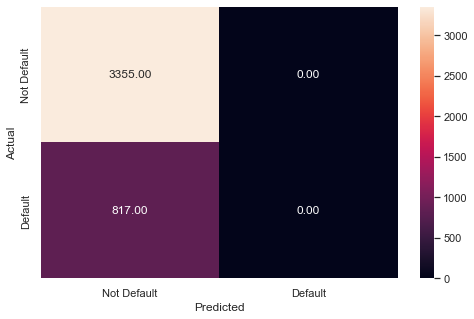

In [73]:
#Predict for train set
# Remove _________ and complete the code
y_preds_train = log_reg.predict(X_train)

#checking the performance on the train dataset
# Remove _________ and complete the code
metrics_score(y_train, y_preds_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1416
           1       0.00      0.00      0.00       372

    accuracy                           0.79      1788
   macro avg       0.40      0.50      0.44      1788
weighted avg       0.63      0.79      0.70      1788



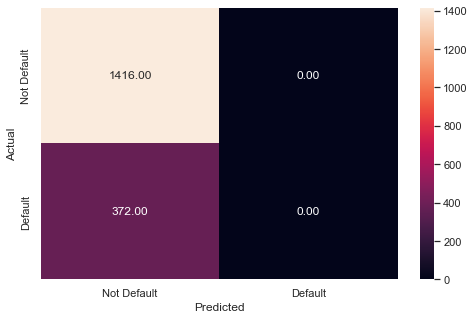

In [74]:
#Predict for test set
# Remove _________ and complete the code

y_preds_test = log_reg.predict(X_test)

#checking the performance on the test dataset
# Remove _________ and complete the code

metrics_score(y_test, y_preds_test)

**Observations: <br>**
Recall is 0 for both the training and testing datasets. This is because of the imbalance in the dataset. Recall for BAD=0 is 100%, indicating that there is a severe bias in the model towards BAD=1, which is also due to the imabalance in the dataset.

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [75]:
log_reg.coef_

array([[-1.73102311e-05, -3.40141960e-06,  1.16844398e-06,
        -2.28490730e-04,  0.00000000e+00,  0.00000000e+00,
        -5.86196254e-03,  6.85432285e-05, -1.54796280e-04,
        -1.17715515e-04, -4.81184594e-06, -9.92674238e-06,
        -7.69901773e-06, -4.46477072e-06,  1.83941504e-06,
         3.46391584e-06]])

In [76]:
# Printing the coefficients of logistic regression
# Remove _________ and complete the code


pd.DataFrame(log_reg.coef_.T, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

coef
NINQ            0.000069
JOB_Self        0.000003
JOB_Sales       0.000002
VALUE           0.000001
DEROG           0.000000
DELINQ          0.000000
MORTDUE        -0.000003
JOB_ProfExe    -0.000004
REASON_HomeImp -0.000005
JOB_Other      -0.000008
JOB_Office     -0.000010
LOAN           -0.000017
DEBTINC        -0.000118
CLNO           -0.000155
YOJ            -0.000228
CLAGE          -0.005862

**Insights <br>**
NINQ has the highest weight assigned to it. DEROG and DELINQ have 0 as their weights, which is incorrect based on the EDA done previously, which showed that DEROG and DELINQ are one of the main KPIs for loan default. Therefore, this model is not able to accurately capture the nuances of the data.

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

In [77]:
lr_estimator_tuned = LogisticRegression(random_state = 123, max_iter=1000, class_weight='balanced')

# Grid of parameters to choose from
parameters = {'intercept_scaling': np.arange(0, 3), 
              'penalty': ['l1', 'l2'],
              'tol': [0.001],
              'verbose': [0,1,2],
              'warm_start':[True, False]
#               'class_weight': ['balanced', {0: 0.2, 1: 0.8}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(lr_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
lr_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
lr_estimator_tuned.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jo

LogisticRegression(class_weight='balanced', intercept_scaling=0, max_iter=1000,
                   random_state=123, tol=0.001, warm_start=True)

              precision    recall  f1-score   support

           0       0.87      0.59      0.70      3355
           1       0.28      0.65      0.39       817

    accuracy                           0.60      4172
   macro avg       0.58      0.62      0.55      4172
weighted avg       0.76      0.60      0.64      4172



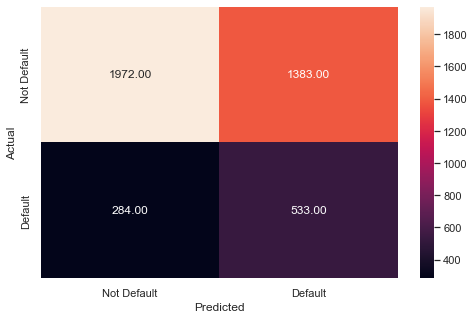

In [78]:
y_preds_train = lr_estimator_tuned.predict(X_train)
metrics_score(y_train, y_preds_train)

              precision    recall  f1-score   support

           0       0.86      0.59      0.70      1416
           1       0.29      0.63      0.40       372

    accuracy                           0.60      1788
   macro avg       0.57      0.61      0.55      1788
weighted avg       0.74      0.60      0.64      1788



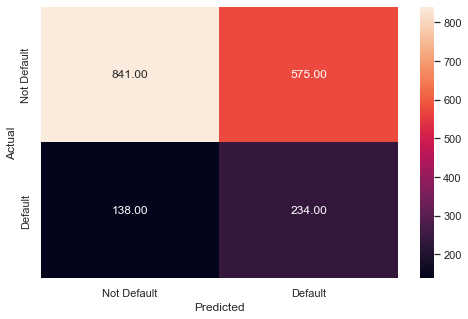

In [79]:
y_preds_test = lr_estimator_tuned.predict(X_test)
metrics_score(y_test, y_preds_test)

<h3> SMOTE </h3>

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
sm = SMOTE(random_state = 123)
X_res, Y_res = sm.fit_resample(X, Y)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, Y_res, test_size = 0.30, random_state = 1)

In [82]:
print("Shape of the training set: ", X_train_res.shape)   

print("Shape of the test set: ", X_test_res.shape)

print("Percentage of classes in the training set:")

print(y_train_res.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test_res.value_counts(normalize = True))

Shape of the training set:  (6679, 16)
Shape of the test set:  (2863, 16)
Percentage of classes in the training set:
1    0.500374
0    0.499626
Name: BAD, dtype: float64
Percentage of classes in the test set:
0    0.500873
1    0.499127
Name: BAD, dtype: float64


In [83]:
lr_estimator_tuned_smote = LogisticRegression(random_state = 123, max_iter=1000, fit_intercept=True, solver='lbfgs')

# Grid of parameters to choose from
parameters = {'intercept_scaling': np.arange(0, 3), 
              'penalty': ['l1', 'l2'],
              'tol': [0.001],
              'verbose': [0,1,2],
              'warm_start':[True, False]
#               'class_weight': ['balanced', {0: 0.2, 1: 0.8}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(lr_estimator_tuned_smote, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train_res, y_train_res)

# Set the classifier to the best combination of parameters
lr_estimator_tuned_smote = grid_obj.best_estimator_

# Fit the best algorithm to the data
lr_estimator_tuned_smote.fit(X_train_res, y_train_res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jo

LogisticRegression(intercept_scaling=0, max_iter=1000, random_state=123,
                   tol=0.001, warm_start=True)

              precision    recall  f1-score   support

           0       0.65      0.61      0.63      3337
           1       0.63      0.67      0.65      3342

    accuracy                           0.64      6679
   macro avg       0.64      0.64      0.64      6679
weighted avg       0.64      0.64      0.64      6679



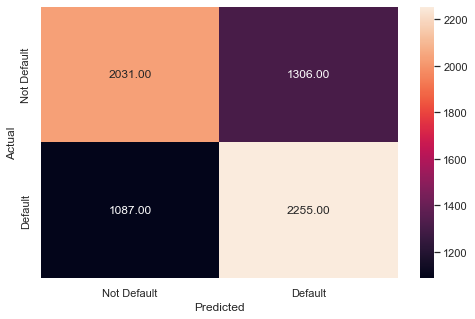

In [84]:
y_preds_train = lr_estimator_tuned_smote.predict(X_train_res)
metrics_score(y_train_res, y_preds_train)

              precision    recall  f1-score   support

           0       0.65      0.62      0.63      1434
           1       0.63      0.66      0.65      1429

    accuracy                           0.64      2863
   macro avg       0.64      0.64      0.64      2863
weighted avg       0.64      0.64      0.64      2863



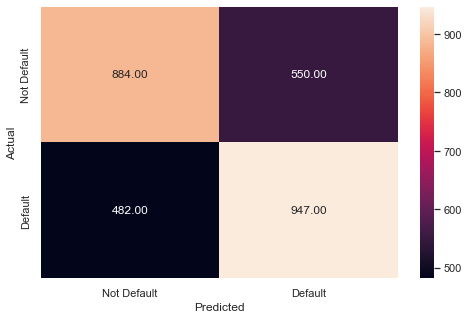

In [85]:
y_preds_test = lr_estimator_tuned_smote.predict(X_test_res)
metrics_score(y_test_res, y_preds_test)

<b>Observations</b><br>
After SMOTE, The Recall on training data increased by 2% to 67%. <br>
But for testing data, the recall doesn't increase significantly after SMOTE. The number of false negatives is very high at 482. <br>
Since balanced data is also not giving high accuracy after tuning the parameters as well, we need to try another machine learning algorithm. Logistic Regression does not give optimal performance for this dataset.

In [86]:
pd.DataFrame(lr_estimator_tuned_smote.coef_.T, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

coef
DEBTINC         0.050543
NINQ            0.028464
CLNO            0.003222
VALUE           0.000001
DEROG           0.000000
DELINQ          0.000000
MORTDUE        -0.000005
LOAN           -0.000021
JOB_Self       -0.000185
JOB_Sales      -0.000217
REASON_HomeImp -0.004234
JOB_Other      -0.006104
JOB_ProfExe    -0.006637
CLAGE          -0.006830
JOB_Office     -0.007220
YOJ            -0.015551

Logistic Regression assiged DEBTINC the highest weight followed by, CLNO and NINQ, while CLAGE and Job_ProfExe were assigned the least weights. DEROG and DELINQ were again assigned 0, which implies that the model does not accurately capture the inctricacies of the data.

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

<h2>Decision trees are robust to outliers because outliers are not involved in the split as they never cause much reduction in the RSS value.</h2>

#### Data Preparation for the tree based model

In [87]:
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)
    

In [88]:
missing_col

[]

No Missing columns. Already imputed missing columns in the previous milestone.

In [89]:
X

LOAN       MORTDUE          VALUE        YOJ  DEROG  DELINQ  \
0      1100.0  25860.000000   39025.000000  10.500000    0.0     0.0   
1      1300.0  70053.000000   68400.000000   7.000000    0.0     0.0   
2      1500.0  13500.000000   16700.000000   4.000000    0.0     0.0   
3      1500.0  71566.093752   98538.057633   8.873159    0.0     0.0   
4      1700.0  97800.000000  112000.000000   3.000000    0.0     0.0   
...       ...           ...            ...        ...    ...     ...   
5955  41600.0  57264.000000   90185.000000  16.000000    0.0     0.0   
5956  41600.0  54576.000000   92937.000000  16.000000    0.0     0.0   
5957  41600.0  54045.000000   92924.000000  15.000000    0.0     0.0   
5958  41600.0  50370.000000   91861.000000  14.000000    0.0     0.0   
5959  41600.0  48811.000000   88934.000000  15.000000    0.0     0.0   

           CLAGE      NINQ       CLNO    DEBTINC  REASON_HomeImp  JOB_Office  \
0      94.366667  1.000000   9.000000  33.681973               1           0   
1     121.833333  0.000000  14.000000  33.681973               1           0   
2     149.466667  1.000000  10.000000  33.681973               1           0   
3     178.635811  1.093394  21.032851  33.681973               0           0   
4      93.333333  0.000000  14.000000  33.681973               1           1   
...          ...       ...        ...        ...             ...         ...   
5955  221.808718  0.000000  16.000000  36.112347               0           0   
5956  208.692070  0.000000  15.000000  35.859971               0           0   
5957  212.279697  0.000000  15.000000  35.556590               0           0   
5958  213.892709  0.000000  16.000000  34.340882               0           0   
5959  219.601002  0.000000  16.000000  34.571519               0           0   

      JOB_Other  JOB_ProfExe  JOB_Sales  JOB_Self  
0             1            0          0         0  
1             1            0          0         0  
2             1            0          0         0  
3             1            0          0         0  
4             0            0          0         0  
...         ...          ...        ...       ...  
5955          1            0          0         0  
5956          1            0          0         0  
5957          1            0          0         0  
5958          1            0          0         0  
5959          1            0          0         0  

[5960 rows x 16 columns]

In [90]:
Y

0       1
1       1
2       1
3       1
4       0
       ..
5955    0
5956    0
5957    0
5958    0
5959    0
Name: BAD, Length: 5960, dtype: category
Categories (2, int64): [0, 1]

#### Split the data

In [91]:
# Split the data into training and test set
# Remove _________ and complete the code


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1) 

In [92]:
print("Shape of the training set: ", X_train.shape)   

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (4172, 16)
Shape of the test set:  (1788, 16)
Percentage of classes in the training set:
0    0.804171
1    0.195829
Name: BAD, dtype: float64
Percentage of classes in the test set:
0    0.791946
1    0.208054
Name: BAD, dtype: float64


In [93]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
# Remove ___________ and complete the code

d_tree =  DecisionTreeClassifier(random_state = 123, class_weight={0: 0.2, 1: 0.8})

In [94]:
#fitting Decision tree model
# Remove ___________ and complete the code
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=123)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



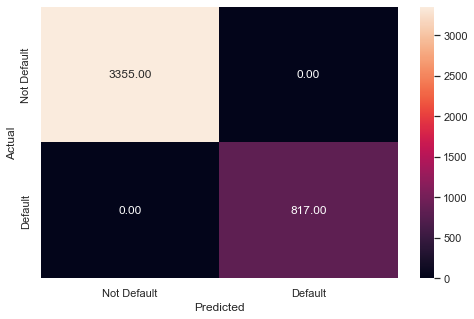

In [95]:
# Checking performance on the training data
# Remove ___________ and complete the code

y_pred_train = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train)

<strong> The Decision Tree model is overfitting on the training dataset, since every metric shows 100% score. </strong>

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1416
           1       0.65      0.57      0.61       372

    accuracy                           0.85      1788
   macro avg       0.77      0.75      0.76      1788
weighted avg       0.84      0.85      0.84      1788



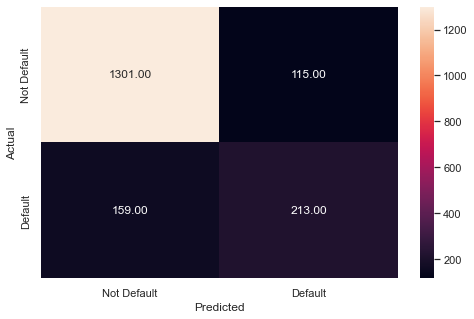

In [96]:
# Checking performance on the testing data
# Remove _________ and complete the code

y_pred_test = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test)

**Insights <br>**
<ul>
    <li> The Decision Tree model is overfitting on the training dataset, since every metric shows 100% score.
    <li> On the testing dataset, it gives good accuracy of 85%, but the recall for BAD=1, is very bad at 58%. Out of 372 actually defaulting clients, 158 were misclassified as non-defaulters. In comparison to thje logistic regression model, wiothout any tuning, this model performs a lot better.
    <li> Recall and Precision of BAD=0 is very high at 92% and 89% respectively, indicating that the model is biased towards BAD=0. This is due to the imbalance in the data.
</ul>

### **Think about it:**
- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [97]:
# Choose the type of classifier. 
# Remove _________ and complete the code
d_tree_tuned = DecisionTreeClassifier(random_state = 123, class_weight = {0: 0.2, 1: 0.8})


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)




# Fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
# Remove _________ and complete the code
d_tree_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=8,
                       min_samples_leaf=20, random_state=123)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      3355
           1       0.55      0.88      0.67       817

    accuracy                           0.83      4172
   macro avg       0.76      0.85      0.78      4172
weighted avg       0.88      0.83      0.85      4172



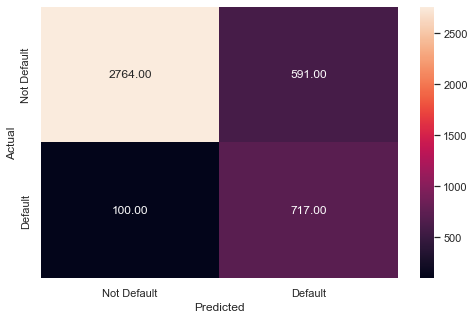

In [98]:
# Checking performance on the training data based on the tuned model
# Remove _________ and complete the code

y_pred_train = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1416
           1       0.53      0.79      0.63       372

    accuracy                           0.81      1788
   macro avg       0.73      0.80      0.75      1788
weighted avg       0.85      0.81      0.82      1788



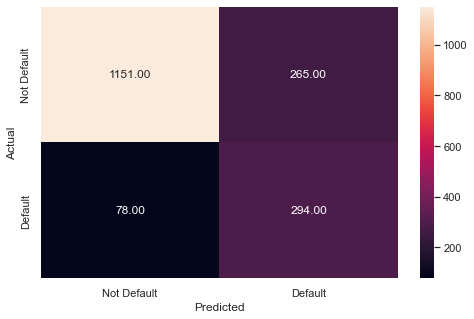

In [99]:
# Checking performance on the testing data based on the tuned model
# Remove _________ and complete the code

y_pred_test = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test)

**Insights <br>**
<ul>
    <li> On the training dataset, model gives 88% recall for BAD=0 and 83% accuracy. But precision score decreased drastically to 55%. This is likely due to the precision-recall tradeoff phenomenon.
    <li> On the testing dataset, model gives 79% recall and macro average of 80%. This is a much better performance than the dtree without tuning, which gave 58% recall.
    <li> The number of false negatives has also decreased to 78. Minimizing this number is desirable for the company to avoid clients who have high likelihood of defaulting in the future.
</ul>

#### Plotting the Decision Tree

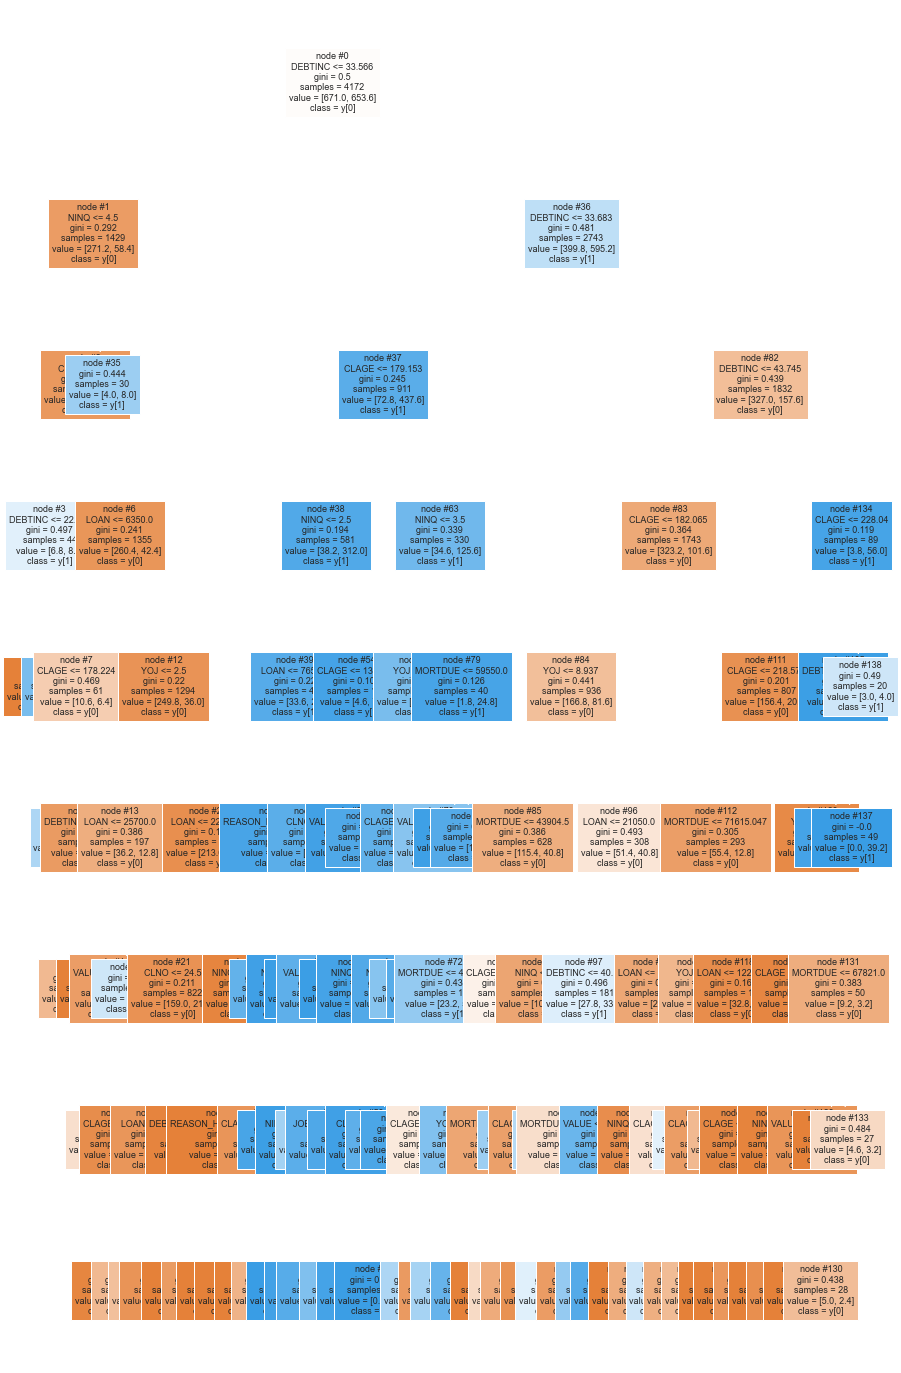

In [100]:
# Plot the decision  tree and analyze it to build the decision rule
# Remove _________ and complete the code


features = list(X.columns)

plt.figure(figsize = (15, 25))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down: <br>
<ol>
    <li> First split occours at DEBTINC, which implies that DEBTINC is one of the most important features for the model.
    <li> For all clients whose DEBTINC less than or equal to 33.683 and CLAGE less than or equal to 179.153, NINQ less than or equal to 3.5with MORTDUE less than or equal to 59550, and so on, they have a high likelihood of defaulting.
    <li> The decision rules are represented by the path from the root node to all blue leaf nodes.
    <li> It is evident from the decision tree that the classification is highly influenced by DEBTINC, CLAGE and NINQ, since they are used for splitting in the 1st 3 layers of the decision tree.
</ol>

In [101]:
print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                     Imp
DEBTINC         0.775887
CLAGE           0.070103
LOAN            0.034392
NINQ            0.032302
YOJ             0.028343
MORTDUE         0.026863
CLNO            0.016390
VALUE           0.012628
JOB_Office      0.001638
REASON_HomeImp  0.001454
DEROG           0.000000
DELINQ          0.000000
JOB_Other       0.000000
JOB_ProfExe     0.000000
JOB_Sales       0.000000
JOB_Self        0.000000


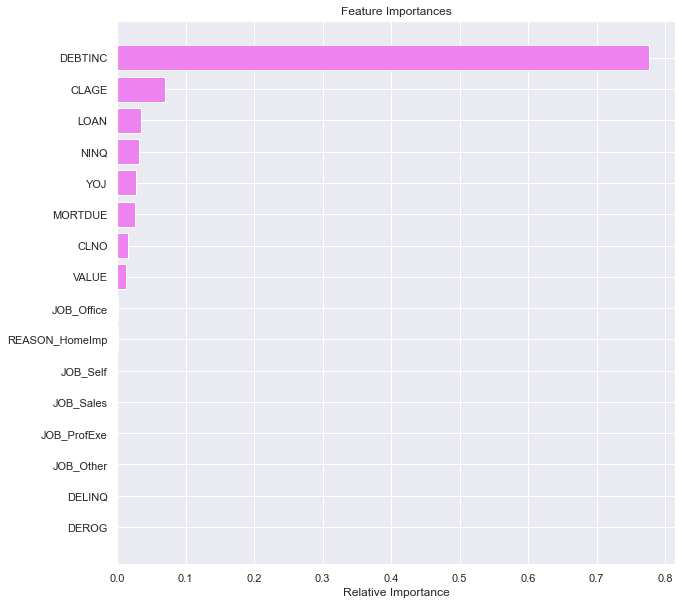

In [102]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

From the feature importance plot, it is evident that DEBTINC has a very high influence on the classification, followed by CLAGE, LOAN and NINQ. While DELINQ and DEROG are at the bottom with no influence on the classification.

<h3> DTree with SMOTE </h3>

In [103]:
# Choose the type of classifier. 
# Remove _________ and complete the code
d_tree_tuned_smote = DecisionTreeClassifier(random_state = 123)


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(d_tree_tuned_smote, parameters, scoring = scorer, cv = 5)




# Fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj = grid_obj.fit(X_train_res, y_train_res)

# Set the clf to the best combination of parameters
# Remove _________ and complete the code
d_tree_tuned_smote = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
d_tree_tuned_smote.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, random_state=123)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3337
           1       0.89      0.89      0.89      3342

    accuracy                           0.89      6679
   macro avg       0.89      0.89      0.89      6679
weighted avg       0.89      0.89      0.89      6679



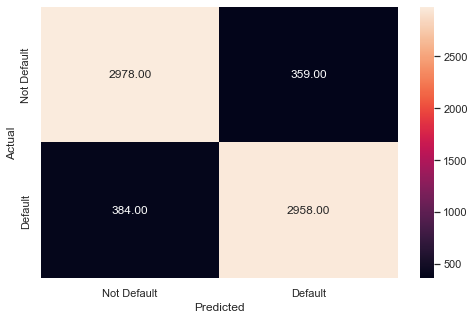

In [104]:
y_pred_train = d_tree_tuned_smote.predict(X_train_res)

metrics_score(y_train_res, y_pred_train)

<h3> Seeing performance on the SMOTE testing dataset</h3>

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1434
           1       0.84      0.82      0.83      1429

    accuracy                           0.84      2863
   macro avg       0.84      0.84      0.84      2863
weighted avg       0.84      0.84      0.84      2863



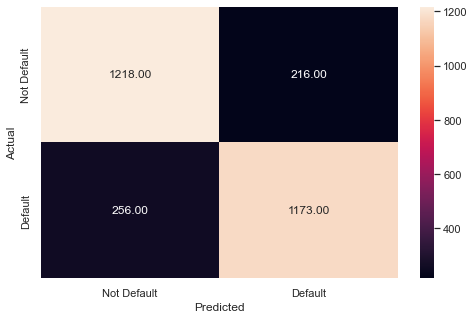

In [105]:
y_pred_test = d_tree_tuned_smote.predict(X_test_res)

metrics_score(y_test_res, y_pred_test)

Accuracy increases to 84% and Recall for BAD increases to 82%

<h3>Seeing performance on the original test dataset</h3>

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1416
           1       0.60      0.72      0.65       372

    accuracy                           0.84      1788
   macro avg       0.76      0.80      0.78      1788
weighted avg       0.86      0.84      0.85      1788



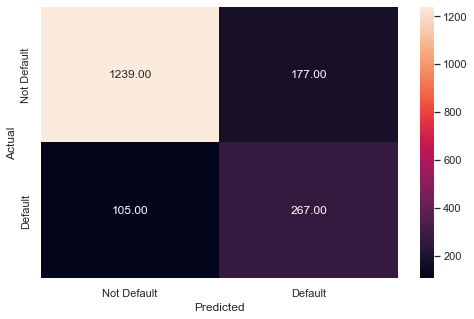

In [106]:
y_pred_test = d_tree_tuned_smote.predict(X_test)

metrics_score(y_test, y_pred_test)

On the original test dataset, the performance of the model on all metrics are a little less than the SMOTE testing dataset, as seen in the above classification report and confusion matrix, where recall on SMOTE testing dataset was 82%, but it decreased on 72% on the original testing dataset. Therefore the Decision Tree model trained after SMOTE, doesn't generalize well on unseen imbalanced data.

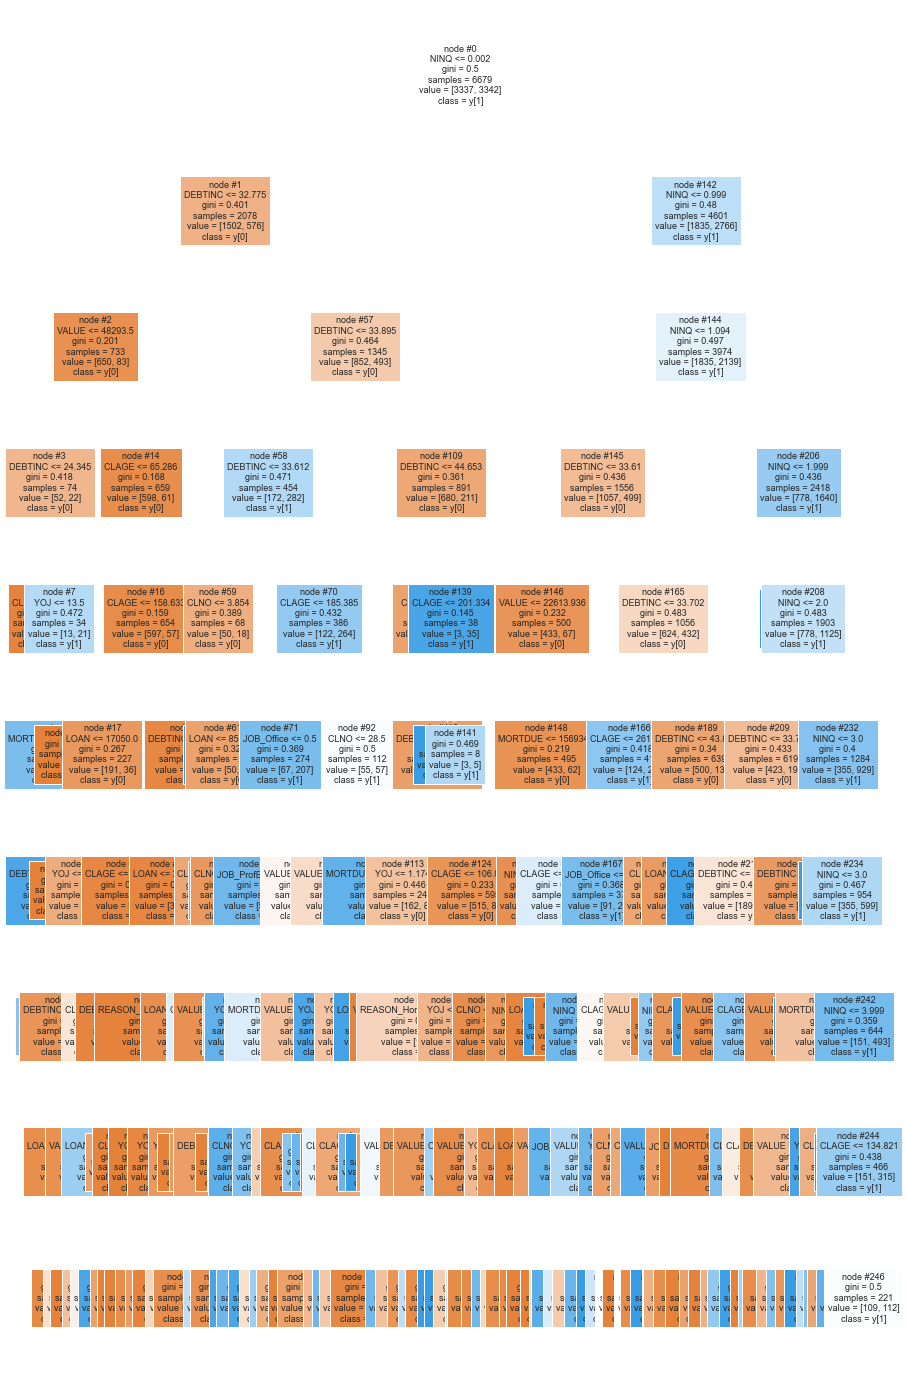

In [107]:
features = list(X.columns)

plt.figure(figsize = (15, 25))

tree.plot_tree(d_tree_tuned_smote, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

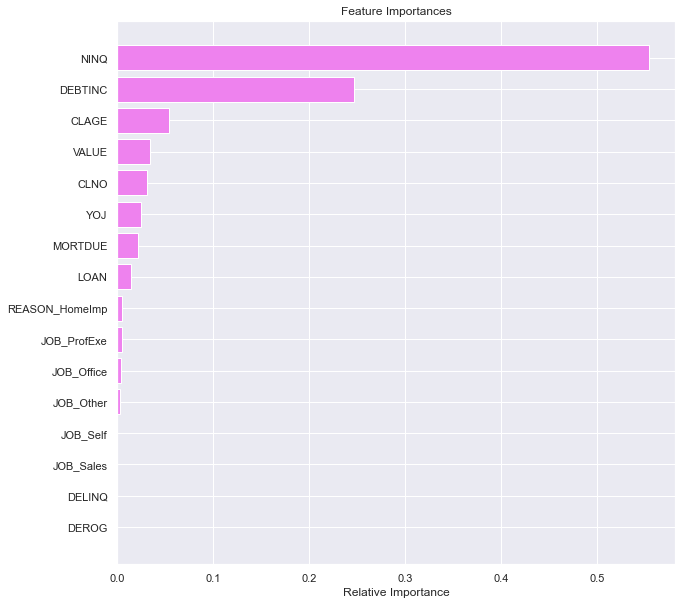

In [108]:
importances = d_tree_tuned_smote.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

After employing SMOTE, the feature importance of NINQ increases drastically as seen in the above plot. NINQ has the highest feature importance followed by DEBTINC. CLAGE, VALUE and CLNO also show high feature importances, while DEROG and DELINQ show the least feature importance.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [109]:
# Defining Random forest CLassifier
# Remove _________ and complete the code

rf_estimator = RandomForestClassifier(random_state = 123, criterion = "entropy")

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=123)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



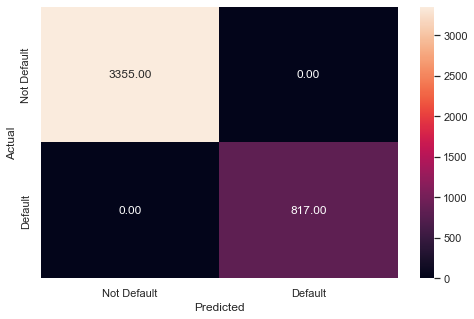

In [110]:
#Checking performance on the training data
# Remove _________ and complete the code
y_pred_train = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1416
           1       0.84      0.59      0.70       372

    accuracy                           0.89      1788
   macro avg       0.87      0.78      0.81      1788
weighted avg       0.89      0.89      0.88      1788



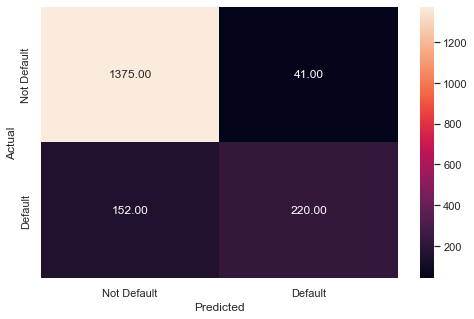

In [111]:
# Checking performance on the test data
# Remove _________ and complete the code

y_pred_test = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test)

**Observations: <br>**
<ul>
    <li> The model gives perfect score in the training dataset, and 89% accuracy with 59% recall on BAD=1, in the testing dataset. This is an indication of overfitting.
    <li> The precision and recall of BAD=0 are very high at 90% and 97% respectively, indicating that there is a large bias in the model towards BAD=0.
</ul>

### **Build a Random Forest model with Class Weights**

In [112]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

# Remove _________ and complete the code

rf_estimator = RandomForestClassifier(random_state = 123, criterion = "entropy", class_weight = {0: 0.2, 1: 0.8})


# Fitting Random Forest model
# Remove _________ and complete the code

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       random_state=123)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



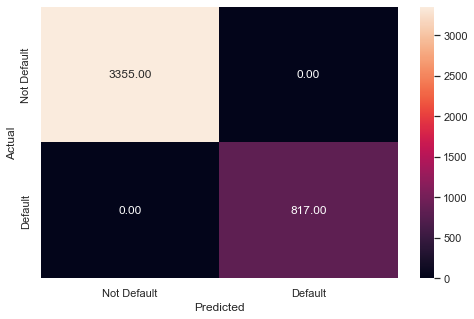

In [113]:
# Checking performance on the train data
# Remove _________ and complete the code

y_pred_train = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1416
           1       0.84      0.56      0.67       372

    accuracy                           0.89      1788
   macro avg       0.87      0.76      0.80      1788
weighted avg       0.88      0.89      0.88      1788



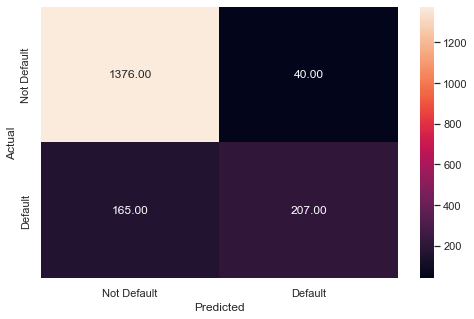

In [114]:
# Checking performance on the test data
# Remove _________ and complete the code

y_pred_test = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test)

The model is still overfitting on the training dataset.

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [115]:
# Choose the type of classifier. 
# Remove _________ and complete the code
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 123)


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {"n_estimators": [50, 110],
    "max_depth": np.arange(5, 10),
    'min_samples_split': [2, 3, 4],
    "min_samples_leaf": [5, 10, 20],
    "max_features": ['sqrt', 'log2', 'None'],
    "class_weight": ["balanced", {0: 0.2, 1: 0.8}]
             }


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)


#fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
rf_estimator_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features='sqrt', min_samples_leaf=10,
                       n_estimators=110, random_state=123)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      3355
           1       0.52      0.85      0.65       817

    accuracy                           0.82      4172
   macro avg       0.74      0.83      0.76      4172
weighted avg       0.87      0.82      0.83      4172



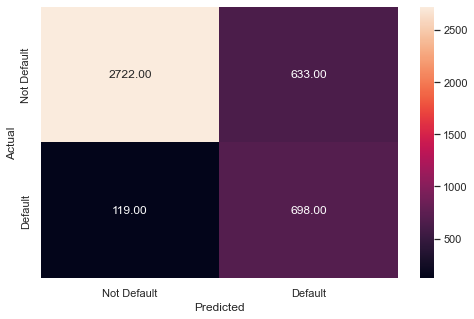

In [116]:
# Checking performance on the training data
# Remove _________ and complete the code
y_pred_train = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1416
           1       0.52      0.79      0.63       372

    accuracy                           0.80      1788
   macro avg       0.73      0.80      0.75      1788
weighted avg       0.85      0.80      0.82      1788



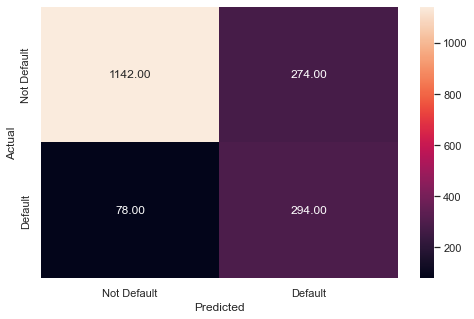

In [117]:
# Checking performace on test dataset
# Remove _________ and complete the code

y_pred_test = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test)

**Insights: <br>**
<ul>
    <li> Recall has increased to 85% for the training dataset and 81% for the dtesting dataset. Accuracy and F1 score have also increased.
    <li> The performance of RF is similar to the performance yielded by DTree, with accuracy and recall being the same.
</ul>

#### Plot the Feature importance of the tuned Random Forest

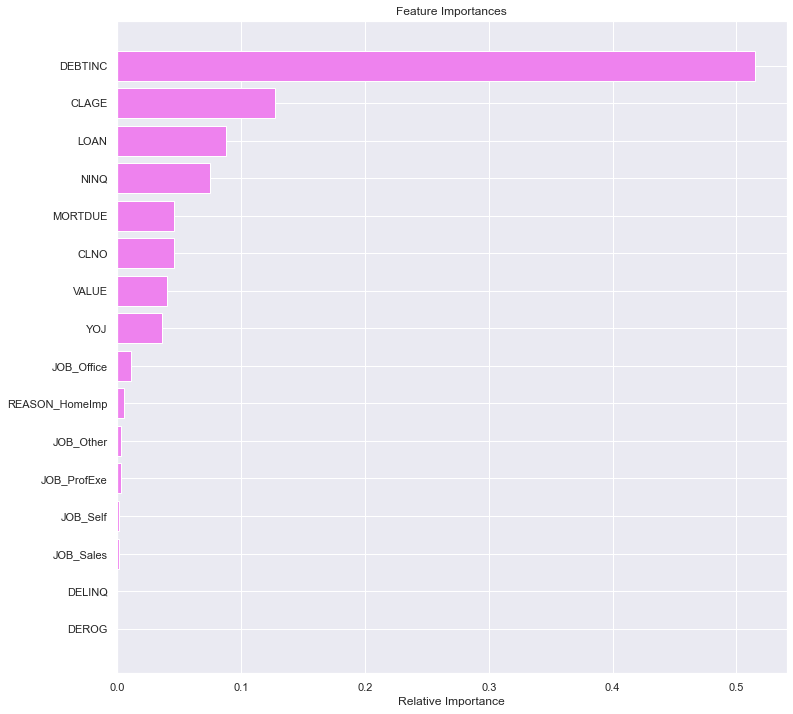

In [118]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code

importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

<h2>XGBoost</h2>

In [119]:
xgb_clf = XGBClassifier()

In [120]:
print("Shape of the training set: ", X_train.shape)   

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (4172, 16)
Shape of the test set:  (1788, 16)
Percentage of classes in the training set:
0    0.804171
1    0.195829
Name: BAD, dtype: float64
Percentage of classes in the test set:
0    0.791946
1    0.208054
Name: BAD, dtype: float64


In [121]:
xgb_clf.fit(X_train, y_train)
y_pred_train = xgb_clf.predict(X_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



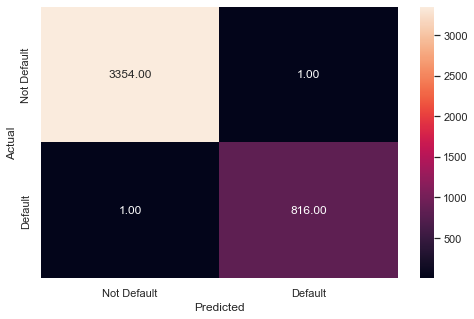

In [122]:
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1416
           1       0.81      0.63      0.71       372

    accuracy                           0.89      1788
   macro avg       0.86      0.80      0.82      1788
weighted avg       0.89      0.89      0.89      1788



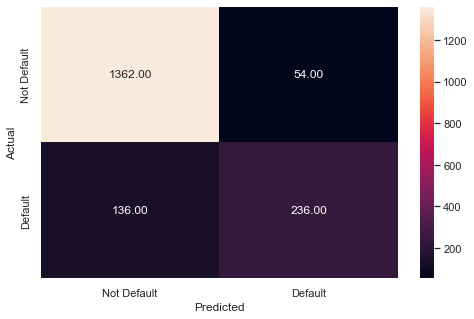

In [123]:
y_pred_test = xgb_clf.predict(X_test)
metrics_score(y_test, y_pred_test)

As seen above, the untuned XGB classifier is overfitting on the training dataset, since it gives perfect performance on the training daataset, but not in the testing dataset. Precision and Recall for BAD=0 is very high and almost perfect but for BAD=1, recall is 63% and precision is 81%. Therefore the model has bias towards BAD=0, which is because of the imbalance in the dataset.

In [124]:
# Choose the type of classifier. 
# Remove _________ and complete the code
xgb_estimator_tuned = XGBClassifier(booster = "gbtree", random_state = 123, n_jobs=4)


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'max_depth':range(3,10,2),
            'min_child_weight':range(1,6,2),
            'learning_rate': [0.30000012],
            'max_bin':[256],
            'n_estimators':[100, 200]
             }


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(xgb_estimator_tuned, parameters, scoring = scorer, cv = 10)


#fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
xgb_estimator_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
xgb_estimator_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.30000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=4, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



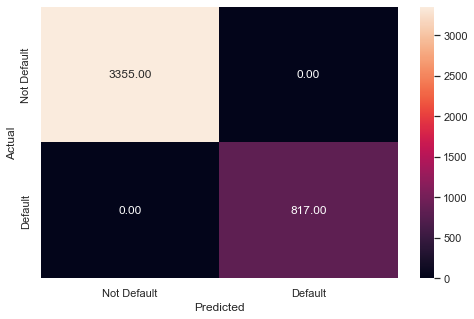

In [125]:
y_pred_train = xgb_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1416
           1       0.81      0.65      0.72       372

    accuracy                           0.90      1788
   macro avg       0.86      0.80      0.83      1788
weighted avg       0.89      0.90      0.89      1788



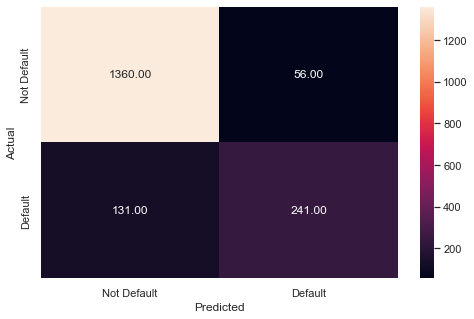

In [126]:
y_pred_test = xgb_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test)

XGBoost doesn't work well for imbalanced data. It doesn't support class_weight parameter. Therefore SMOTE might be useful here.

In [127]:
df = pd.DataFrame(grid_obj.cv_results_)
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.108221      0.006032         0.005104        0.000302   
1        0.205412      0.007379         0.005406        0.000490   
2        0.109320      0.006216         0.005305        0.000461   
3        0.207774      0.011819         0.005705        0.000459   
4        0.111477      0.006488         0.005901        0.000300   
5        0.206502      0.013880         0.005804        0.000399   
6        0.166536      0.005389         0.005505        0.000499   
7        0.331833      0.012692         0.005703        0.000459   
8        0.162409      0.009523         0.005606        0.000488   
9        0.308951      0.011442         0.005704        0.000458   
10       0.159087      0.007090         0.005504        0.000498   
11       0.323348      0.016630         0.006404        0.000489   
12       0.241161      0.009824         0.006104        0.000538   
13       0.443467      0.009426         0.006203        0.000400   
14       0.228912      0.013904         0.006502        0.000670   
15       0.423962      0.010928         0.006701        0.000640   
16       0.227027      0.007132         0.006602        0.000492   
17       0.401438      0.007964         0.006601        0.000490   
18       0.293110      0.007025         0.006705        0.000642   
19       0.516398      0.012304         0.007205        0.001663   
20       0.283369      0.008367         0.006403        0.000491   
21       0.490122      0.019738         0.006805        0.000601   
22       0.284338      0.011942         0.007102        0.000942   
23       0.469718      0.025515         0.006602        0.000662   

   param_learning_rate param_max_bin param_max_depth param_min_child_weight  \
0                  0.3           256               3                      1   
1                  0.3           256               3                      1   
2                  0.3           256               3                      3   
3                  0.3           256               3                      3   
4                  0.3           256               3                      5   
5                  0.3           256               3                      5   
6                  0.3           256               5                      1   
7                  0.3           256               5                      1   
8                  0.3           256               5                      3   
9                  0.3           256               5                      3   
10                 0.3           256               5                      5   
11                 0.3           256               5                      5   
12                 0.3           256               7                      1   
13                 0.3           256               7                      1   
14                 0.3           256               7                      3   
15                 0.3           256               7                      3   
16                 0.3           256               7                      5   
17                 0.3           256               7                      5   
18                 0.3           256               9                      1   
19                 0.3           256               9                      1   
20                 0.3           256               9                      3   
21                 0.3           256               9                      3   
22                 0.3           256               9                      5   
23                 0.3           256               9                      5   

   param_n_estimators                                             params  ...  \
0                 100  {'learning_rate': 0.30000012, 'max_bin': 256, ...  ...   
1                 200  {'learning_rate': 0.30000012, 'max_bin': 256, ...  ...   
2                 100  {'learning_rate': 0.30000012, 'max_bin': 256, ...  ...   
3  

In [128]:
np.array(df[df['rank_test_score'] == 1].loc[:,'split0_test_score':'split9_test_score'])[0]

array([0.63414634, 0.65853659, 0.65432099, 0.61728395, 0.65432099,
       0.68292683, 0.7195122 , 0.63414634, 0.62195122, 0.63414634])

In [129]:
df[df['rank_test_score'] == 1]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
21       0.490122      0.019738         0.006805        0.000601   

   param_learning_rate param_max_bin param_max_depth param_min_child_weight  \
21                 0.3           256               9                      3   

   param_n_estimators                                             params  ...  \
21                200  {'learning_rate': 0.30000012, 'max_bin': 256, ...  ...   

    split3_test_score  split4_test_score  split5_test_score  \
21           0.617284           0.654321           0.682927   

    split6_test_score  split7_test_score  split8_test_score  \
21           0.719512           0.634146           0.621951   

    split9_test_score  mean_test_score  std_test_score  rank_test_score  
21           0.634146         0.651129        0.029368                1  

[1 rows x 23 columns]

<h2>Mean test score = 65.11 %</h2>

In [130]:
X_ticks = np.arange(1,11)
Y_no_smote = np.array(df[df['rank_test_score'] == 1].loc[:,'split0_test_score':'split9_test_score'])[0]

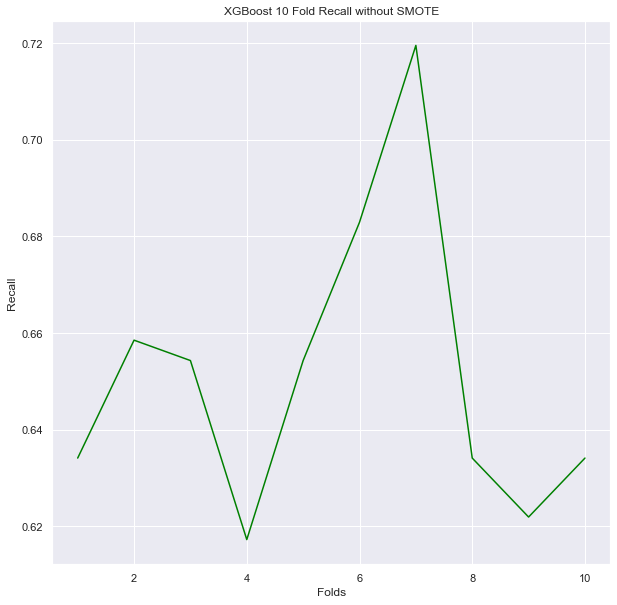

In [131]:
fig = plt.subplots(figsize=(10,10))

plt.title('XGBoost 10 Fold Recall without SMOTE')
plt.xlabel('Folds')
plt.ylabel('Recall')
plt.plot(X_ticks,Y_no_smote, color='green')
plt.show()

<h2>XGBoost with SMOTE</h2>

In [132]:
sm = SMOTE(random_state = 123)
X_res, Y_res = sm.fit_resample(X, Y)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, Y_res, test_size = 0.30, random_state = 1)

In [133]:
print("Shape of the training set: ", X_train_res.shape)   

print("Shape of the test set: ", X_test_res.shape)

print("Percentage of classes in the training set:")

print(y_train_res.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test_res.value_counts(normalize = True))

Shape of the training set:  (6679, 16)
Shape of the test set:  (2863, 16)
Percentage of classes in the training set:
1    0.500374
0    0.499626
Name: BAD, dtype: float64
Percentage of classes in the test set:
0    0.500873
1    0.499127
Name: BAD, dtype: float64


<h2>5 folds</h2>

In [134]:
# Choose the type of classifier. 
# Remove _________ and complete the code
xgb_estimator_tuned_smote = XGBClassifier(booster = "gbtree", random_state = 123, n_jobs=4)


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'max_depth':range(3,10,2),
            'min_child_weight':range(1,6,2),
            'learning_rate': [0.30000012],
            'max_bin':[256],
            'n_estimators':[100, 200]
             }


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(xgb_estimator_tuned_smote, parameters, scoring = scorer, cv = 5)


#fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj = grid_obj.fit(X_train_res, y_train_res)


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
xgb_estimator_tuned_smote = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
xgb_estimator_tuned_smote.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.30000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=4, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3337
           1       1.00      1.00      1.00      3342

    accuracy                           1.00      6679
   macro avg       1.00      1.00      1.00      6679
weighted avg       1.00      1.00      1.00      6679



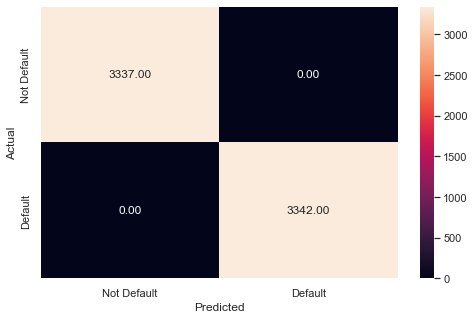

In [135]:
y_pred_train = xgb_estimator_tuned_smote.predict(X_train_res)
metrics_score(y_train_res, y_pred_train)

<h3> Performance on SMOTE testing dataset </h3>

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1434
           1       0.96      0.94      0.95      1429

    accuracy                           0.95      2863
   macro avg       0.95      0.95      0.95      2863
weighted avg       0.95      0.95      0.95      2863



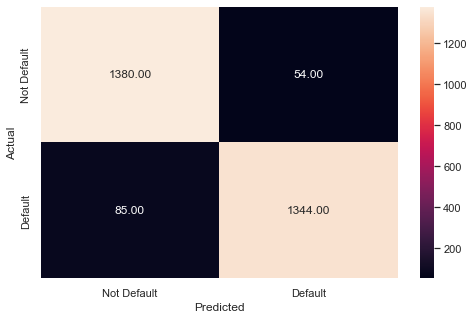

In [136]:
y_pred_test = xgb_estimator_tuned_smote.predict(X_test_res)
metrics_score(y_test_res, y_pred_test)

XGBoost gives 95% accuracy and 94% Recall BAD=1 after incorporating SMOTE.

<h3>Performance on the testing dataset without SMOTE </h3>

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1416
           1       0.94      0.90      0.92       372

    accuracy                           0.97      1788
   macro avg       0.96      0.94      0.95      1788
weighted avg       0.97      0.97      0.97      1788



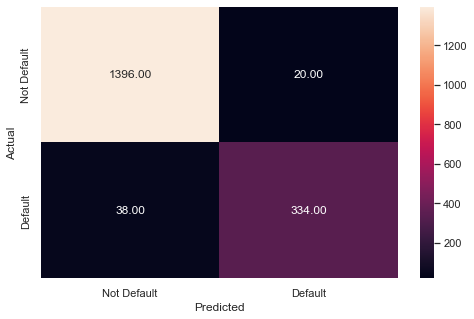

In [137]:
y_pred_test = xgb_estimator_tuned_smote.predict(X_test)
metrics_score(y_test, y_pred_test)

XGBoost also gives good accuracy on the original test dataset, without SMOTE. Therefore, the model trained on the SMOTE training dataset, is able to generalize over imbalanced datasets as well and gives good performance.
Recall for BAD=1 is 90% with only 38 false negatives and F1 score for BAD=1 is 92%. Accuracy is 97%. Therefore, this model performs the best.

<h2> Feature Importance of XGBoost </h2>

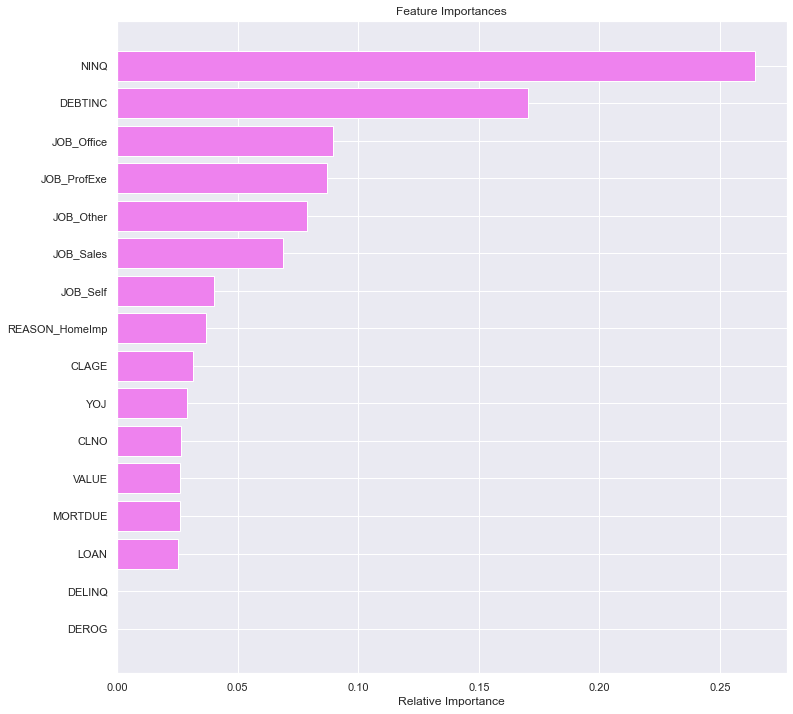

In [138]:
importances = xgb_estimator_tuned_smote.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

NINQ is clearly the most important feature having its value above 0.25 which implies that the number of recent credit inquiries plays a huge role in the classification. It is followed by DEBTINC, which also has a very high feature importance around 0.17. Therefore, the debt-to-income ratio is a big contributing factor in identifying if a client will default on their loan. Job_Office, Job_ProfExe, Job_Other and other Job columns also seem to have high feature importance. All other features except DELINQ and DEROG have positive feature importances. DEROG and DELINQ have feature importance = 0.

<h2>10 folds</h2>

In [139]:
# Choose the type of classifier. 
# Remove _________ and complete the code
xgb_estimator_tuned_smote = XGBClassifier(booster = "gbtree", random_state = 123, n_jobs=4)


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'max_depth':range(3,10,2),
            'min_child_weight':range(1,6,2),
            'learning_rate': [0.30000012],
            'max_bin':[256],
            'n_estimators':[100, 200]
             }


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(xgb_estimator_tuned_smote, parameters, scoring = scorer, cv = 10)


#fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj = grid_obj.fit(X_train_res, y_train_res)


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
xgb_estimator_tuned_smote = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
xgb_estimator_tuned_smote.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.30000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=4, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3337
           1       1.00      1.00      1.00      3342

    accuracy                           1.00      6679
   macro avg       1.00      1.00      1.00      6679
weighted avg       1.00      1.00      1.00      6679



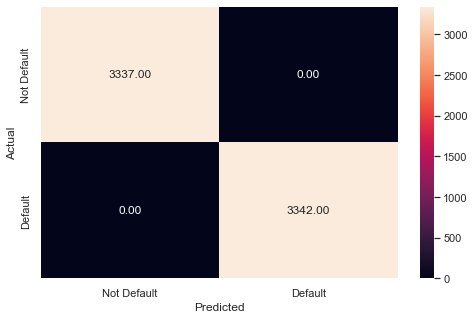

In [140]:
y_pred_train = xgb_estimator_tuned_smote.predict(X_train_res)
metrics_score(y_train_res, y_pred_train)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1434
           1       0.96      0.94      0.95      1429

    accuracy                           0.95      2863
   macro avg       0.95      0.95      0.95      2863
weighted avg       0.95      0.95      0.95      2863



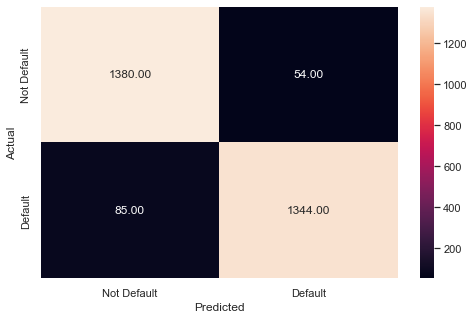

In [141]:
y_pred_test = xgb_estimator_tuned_smote.predict(X_test_res)
metrics_score(y_test_res, y_pred_test)

<h2>Testing this model on the original imbalanced testing dataset</h2>

In [142]:
print("Percentage of classes in the smote test set:")
print(y_test_res.value_counts(normalize = True))

print("\nPercentage of classes in the original imbalanced test set:")
print(y_test.value_counts(normalize = True))

Percentage of classes in the smote test set:
0    0.500873
1    0.499127
Name: BAD, dtype: float64

Percentage of classes in the original imbalanced test set:
0    0.791946
1    0.208054
Name: BAD, dtype: float64


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1416
           1       0.94      0.90      0.92       372

    accuracy                           0.97      1788
   macro avg       0.96      0.94      0.95      1788
weighted avg       0.97      0.97      0.97      1788



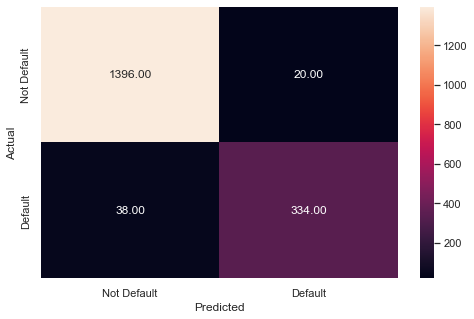

In [143]:
y_pred_test = xgb_estimator_tuned_smote.predict(X_test)
metrics_score(y_test, y_pred_test)

<h3>It gives 90% recall on the imbalanced testing dataset as well, as seen above.</h3>

<h2>Plotting the line plot of the recall of best estimator across 10 folds</h2>

In [144]:
df = pd.DataFrame(grid_obj.cv_results_)
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.186400      0.010683         0.006103        0.000536   
1        0.359676      0.014341         0.006303        0.000641   
2        0.179764      0.007367         0.005902        0.000539   
3        0.364270      0.016123         0.006204        0.000401   
4        0.182235      0.008331         0.006805        0.002441   
5        0.380546      0.020810         0.007302        0.001006   
6        0.300429      0.010942         0.006104        0.000302   
7        0.585283      0.019407         0.006704        0.000643   
8        0.287914      0.013526         0.006003        0.000447   
9        0.570194      0.018554         0.006605        0.000491   
10       0.280597      0.013338         0.006203        0.000399   
11       0.548264      0.014251         0.006805        0.000600   
12       0.412646      0.017294         0.006105        0.000299   
13       0.755324      0.022657         0.006907        0.000299   
14       0.389022      0.012790         0.006504        0.000499   
15       0.715509      0.007008         0.006905        0.000537   
16       0.377497      0.013654         0.006503        0.000670   
17       0.714304      0.020550         0.006907        0.000541   
18       0.510030      0.011142         0.006504        0.000501   
19       0.910111      0.028436         0.007405        0.000490   
20       0.471874      0.019051         0.006504        0.000501   
21       0.845819      0.020138         0.007203        0.000399   
22       0.460843      0.028696         0.006506        0.000501   
23       0.795352      0.026814         0.007307        0.000461   

   param_learning_rate param_max_bin param_max_depth param_min_child_weight  \
0                  0.3           256               3                      1   
1                  0.3           256               3                      1   
2                  0.3           256               3                      3   
3                  0.3           256               3                      3   
4                  0.3           256               3                      5   
5                  0.3           256               3                      5   
6                  0.3           256               5                      1   
7                  0.3           256               5                      1   
8                  0.3           256               5                      3   
9                  0.3           256               5                      3   
10                 0.3           256               5                      5   
11                 0.3           256               5                      5   
12                 0.3           256               7                      1   
13                 0.3           256               7                      1   
14                 0.3           256               7                      3   
15                 0.3           256               7                      3   
16                 0.3           256               7                      5   
17                 0.3           256               7                      5   
18                 0.3           256               9                      1   
19                 0.3           256               9                      1   
20                 0.3           256               9                      3   
21                 0.3           256               9                      3   
22                 0.3           256               9                      5   
23                 0.3           256               9                      5   

   param_n_estimators                                             params  ...  \
0                 100  {'learning_rate': 0.30000012, 'max_bin': 256, ...  ...   
1                 200  {'learning_rate': 0.30000012, 'max_bin': 256, ...  ...   
2                 100  {'learning_rate': 0.30000012, 'max_bin': 256, ...  ...   
3  

In [145]:
np.array(df[df['rank_test_score'] == 1].loc[:,'split0_test_score':'split9_test_score'])[0]

array([0.91044776, 0.93432836, 0.94610778, 0.94011976, 0.93413174,
       0.94311377, 0.93113772, 0.9251497 , 0.93712575, 0.94610778])

In [146]:
df[df['rank_test_score'] == 1].loc[:,'split0_test_score':'split9_test_score'].columns

Index(['split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score'],
      dtype='object')

In [147]:
df[df['rank_test_score'] == 1]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
19       0.910111      0.028436         0.007405         0.00049   

   param_learning_rate param_max_bin param_max_depth param_min_child_weight  \
19                 0.3           256               9                      1   

   param_n_estimators                                             params  ...  \
19                200  {'learning_rate': 0.30000012, 'max_bin': 256, ...  ...   

    split3_test_score  split4_test_score  split5_test_score  \
19            0.94012           0.934132           0.943114   

    split6_test_score  split7_test_score  split8_test_score  \
19           0.931138            0.92515           0.937126   

    split9_test_score  mean_test_score  std_test_score  rank_test_score  
19           0.946108         0.934777         0.01029                1  

[1 rows x 23 columns]

In [148]:
X_ticks = np.arange(1,11)
Y_smote = np.array(df[df['rank_test_score'] == 1].loc[:,'split0_test_score':'split9_test_score'])[0]

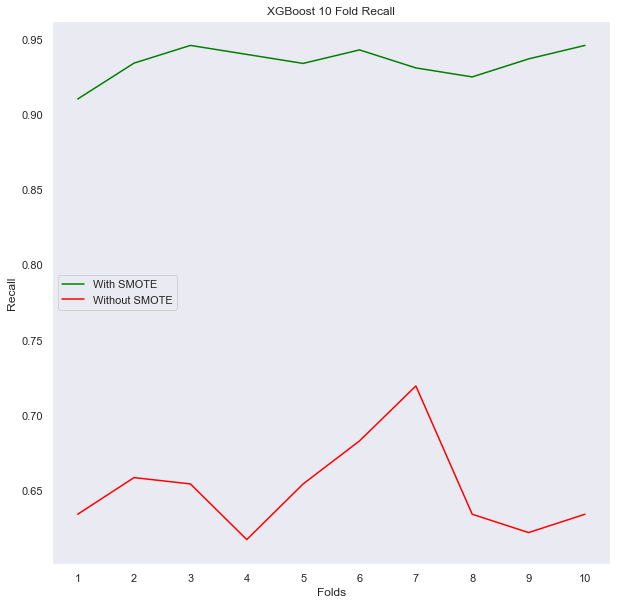

In [149]:
fig = plt.subplots(figsize=(10,10))

plt.title('XGBoost 10 Fold Recall')
plt.xlabel('Folds')
plt.ylabel('Recall')
plt.plot(X_ticks, Y_smote, color='green')
plt.plot(X_ticks, Y_no_smote, color='red')
plt.legend(['With SMOTE', 'Without SMOTE'], loc='center left')
plt.xticks(X_ticks)
plt.grid(False)
plt.show()

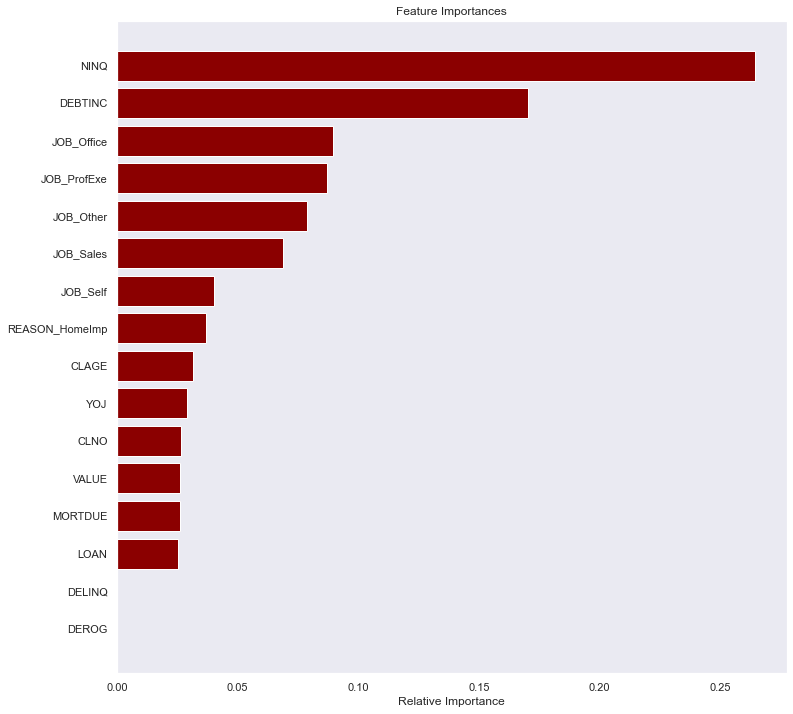

In [150]:
importances = xgb_estimator_tuned_smote.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'darkred', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')
plt.grid(False)
plt.show()

### **Comparing Model Performances**

In [151]:
def get_recall_score(model, X_train, X_test, y_train, y_test, flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [152]:
##  Function to calculate precision score
def get_precision_score(model, X_train, X_test, y_train, y_test, flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [153]:
##  Function to calculate accuracy score
def get_accuracy_score(model, X_train, X_test, y_train, y_test, flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [154]:
# Make the list of all the model names 

models = [LogisticRegression(), lr_estimator_tuned, lr_estimator_tuned_smote, DecisionTreeClassifier(), d_tree_tuned, d_tree_tuned_smote, \
          RandomForestClassifier(), rf_estimator_tuned, BaggingClassifier(), XGBClassifier(), xgb_estimator_tuned, \
          xgb_estimator_tuned_smote, KNeighborsClassifier()]
# Remove _________ and complete the code

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    if((model == d_tree_tuned_smote) | (model == xgb_estimator_tuned_smote)):
        model.fit(X_train_res, y_train_res)
        j = get_accuracy_score(model, X_train_res, X_test_res, y_train_res, y_test_res, False)
        acc_train.append(j[0])
        acc_test.append(j[1])
        
         # recall score
        k = get_recall_score(model, X_train_res, X_test_res, y_train_res, y_test_res, False)
        recall_train.append(k[0])
        recall_test.append(k[1])
        
        # precision score
        l = get_precision_score(model, X_train_res, X_test_res, y_train_res, y_test_res, False)
        precision_train.append(l[0])
        precision_test.append(l[1])
    
    else: 
        model.fit(X_train, y_train)
        j = get_accuracy_score(model, X_train, X_test, y_train, y_test, False)
        acc_train.append(j[0])
        acc_test.append(j[1])

        # recall score
        k = get_recall_score(model, X_train, X_test, y_train, y_test, False)
        recall_train.append(k[0])
        recall_test.append(k[1])

        # precision score
        l = get_precision_score(model, X_train, X_test, y_train, y_test, False)
        precision_train.append(l[0])
        precision_test.append(l[1])

In [155]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]
# Remove _________ and complete the code

comparison_frame = pd.DataFrame({'Model':['Logistic Regression', 'Logistic Regression Tuned', \
                                          'Logistic Regression Tuned with SMOTE', 'Decision Tree Classifier', \
                                         'Decision Tree Tuned', 'Decision Tree Tuned with SMOTE', 'Random Forest', \
                                          'Random Forest Tuned', 'Bagging Classifier', 'XGBoost', 'XGBoost Tuned',\
                                          ' XGBoost Tuned with SMOTE', 'KNN'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  \
0                    Logistic Regression        0.804171       0.791946   
1              Logistic Regression Tuned        0.600431       0.601230   
2   Logistic Regression Tuned with SMOTE        0.804890       0.791946   
3               Decision Tree Classifier        1.000000       0.842841   
4                    Decision Tree Tuned        0.834372       0.808166   
5         Decision Tree Tuned with SMOTE        0.888756       0.835138   
6                          Random Forest        1.000000       0.890380   
7                    Random Forest Tuned        0.819751       0.803132   
8                     Bagging Classifier        0.992090       0.865213   
9                                XGBoost        0.999521       0.893736   
10                         XGBoost Tuned        1.000000       0.895414   
11              XGBoost Tuned with SMOTE        1.000000       0.951450   
12                                   KNN        0.853308       0.813758   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0       0.000000     0.000000         0.000000        0.000000  
1       0.652387     0.629032         0.278184        0.289246  
2       0.013464     0.010753         0.578947        0.500000  
3       1.000000     0.532258         1.000000        0.649180  
4       0.877601     0.790323         0.548165        0.525939  
5       0.885099     0.820854         0.891770        0.844492  
6       1.000000     0.569892         1.000000        0.854839  
7       0.854345     0.790323         0.524418        0.517606  
8       0.965728     0.510753         0.993703        0.763052  
9       0.998776     0.634409         0.998776        0.813793  
10      1.000000     0.647849         1.000000        0.811448  
11      1.000000     0.940518         1.000000        0.961373  
12      0.339045     0.228495         0.793696        0.648855

In [156]:
comparison_frame.sort_values('Test_Recall', ascending = False).reset_index(drop=True)

Model  Train_Accuracy  Test_Accuracy  \
0               XGBoost Tuned with SMOTE        1.000000       0.951450   
1         Decision Tree Tuned with SMOTE        0.888756       0.835138   
2                    Decision Tree Tuned        0.834372       0.808166   
3                    Random Forest Tuned        0.819751       0.803132   
4                          XGBoost Tuned        1.000000       0.895414   
5                                XGBoost        0.999521       0.893736   
6              Logistic Regression Tuned        0.600431       0.601230   
7                          Random Forest        1.000000       0.890380   
8               Decision Tree Classifier        1.000000       0.842841   
9                     Bagging Classifier        0.992090       0.865213   
10                                   KNN        0.853308       0.813758   
11  Logistic Regression Tuned with SMOTE        0.804890       0.791946   
12                   Logistic Regression        0.804171       0.791946   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0       1.000000     0.940518         1.000000        0.961373  
1       0.885099     0.820854         0.891770        0.844492  
2       0.877601     0.790323         0.548165        0.525939  
3       0.854345     0.790323         0.524418        0.517606  
4       1.000000     0.647849         1.000000        0.811448  
5       0.998776     0.634409         0.998776        0.813793  
6       0.652387     0.629032         0.278184        0.289246  
7       1.000000     0.569892         1.000000        0.854839  
8       1.000000     0.532258         1.000000        0.649180  
9       0.965728     0.510753         0.993703        0.763052  
10      0.339045     0.228495         0.793696        0.648855  
11      0.013464     0.010753         0.578947        0.500000  
12      0.000000     0.000000         0.000000        0.000000

**Insights: <br>**
<ul>
    <li> XGboost Tuned with SMOTE gives the best performance in terms of all metrics being utilized in this project. For BAD = 1, Recall = 94.05% on the testing dataset with SMOTE and 90% on the imbalanced testing dataset without SMOTE. This indicates that XGBoost combined with SMOTE yields a model that is able to generalize well over unseen imbalanced data as well. Accuracy = 95.15% on the testing dataset with SMOTE and 97% on the testing dataset without SMOTE. F1 score = 95% on the testing dataset with SMOTE and 92% on the testing dataset without SMOTE, for BAD=1.
    <li> Decision Tree with SMOTE gives the second best performance giving Test Recall of 82.08% on the testing dataset with SMOTE. But on the imbalanced testing dataset without SMOTE, the recall decreases to 72%. Therefore, the model trained after SMOTE is not able to generalize well on unseen imbalanced data.
    <li> Logistic Regression performs the worst among all algorithms employed in this project. Even after hyperparameter tuning, the recall doesn't increase. 
    <li> DEBTINC and NINQ seem to the most important features having the highest influence on the classification across all models.
</ul>

**1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?

**2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?

<h2>Answers to the above questions have been mentioned in the word document submitted alongside this jupyter notebook. </h2>